In [407]:
import os
from dotenv import load_dotenv
import gspread
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#calling function to get environment variable from .env file
load_dotenv()

current_working_dir = os.getcwd()
#project_json is the credential file for the service account created
project_json = os.getenv("PROJECT_JSON")
path = os.path.join(current_working_dir,project_json)

#authorizing the gspread to work as the service account
client = gspread.service_account(path)
spreadsheet = client.open_by_url("https://docs.google.com/spreadsheets/d/1SUlcukpgxf6pfFQbj6DKQZXSlOhyBOSuBdbmQ2ZbhTM/edit#gid=327494290")
worksheet = spreadsheet.worksheet("missing_data")

#getting data from spreadsheet
spreadsheet_data = worksheet.get_all_records()
spreadsheet_data[1]

{'Permit Number': 201604000000.0,
 'Permit Type': 4,
 'Permit Type Definition': 'sign - erect',
 'Permit Creation Date': '04/19/2016',
 'Block': 306,
 'Lot': 7,
 'Street Number': 440,
 'Street Number Suffix': '',
 'Street Name': 'Geary',
 'Street Suffix': 'St',
 'Unit': 0,
 'Unit Suffix': '',
 'Description': 'remove (e) awning and associated signs.',
 'Current Status': 'issued',
 'Current Status Date': '08/03/2017',
 'Filed Date': '04/19/2016',
 'Issued Date': '08/03/2017',
 'Completed Date': '',
 'First Construction Document Date': '08/03/2017',
 'Structural Notification': '',
 'Number of Existing Stories': 7,
 'Number of Proposed Stories': '',
 'Voluntary Soft-Story Retrofit': '',
 'Fire Only Permit': '',
 'Permit Expiration Date': '12/03/2017',
 'Estimated Cost': 1,
 'Revised Cost': 500,
 'Existing Use': 'tourist hotel/motel',
 'Existing Units': '',
 'Proposed Use': '',
 'Proposed Units': '',
 'Plansets': 2,
 'TIDF Compliance': '',
 'Existing Construction Type': 3,
 'Existing Constr

## Exploratory Data Analysis 

In [408]:
#Creating DataFrame and viewing dataframe
data = pd.DataFrame(spreadsheet_data)
data

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505000000.0,4,sign - erect,05/06/2015,326,23,140,,Ellis,St,...,3,constr type 3,,,,3,Tenderloin,94102,"(37.785719256680785, -122.40852313194863)",1.380610e+12
1,201604000000.0,4,sign - erect,04/19/2016,306,7,440,,Geary,St,...,3,constr type 3,,,,3,Tenderloin,94102,"(37.78733980600732, -122.41063199757738)",1.420160e+12
2,201605000000.0,3,additions alterations or repairs,05/27/2016,595,203,1647,,Pacific,Av,...,1,constr type 1,1,constr type 1,,3,Russian Hill,94109,"(37.7946573324287, -122.42232562979227)",1.424860e+12
3,201611000000.0,8,otc alterations permit,11/07/2016,156,11,1230,,Pacific,Av,...,5,wood frame (5),5,wood frame (5),,3,Nob Hill,94109,"(37.79595867909168, -122.41557405519474)",1.443570e+12
4,201611000000.0,6,demolitions,11/28/2016,342,1,950,,Market,St,...,3,constr type 3,,,,6,Tenderloin,94102,"(37.78315261897309, -122.40950883997789)",1.445480e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15359,201306000000.0,8,otc alterations permit,06/11/2013,7104,018B,162,,Farallones,St,...,5,wood frame (5),5,wood frame (5),,11,Oceanview/Merced/Ingleside,94112,"(37.7143177382725, -122.45793648914099)",1.307690e+12
15360,201306000000.0,8,otc alterations permit,06/11/2013,3609,81,3549,,20th,St,...,5,wood frame (5),5,wood frame (5),,9,Mission,94110,"(37.7583635958755, -122.42012861020109)",1.307690e+12
15361,201306000000.0,8,otc alterations permit,06/11/2013,3609,81,3551,,20th,St,...,5,wood frame (5),5,wood frame (5),,9,Mission,94110,"(37.7583635958755, -122.42012861020109)",1.307690e+12
15362,201306000000.0,8,otc alterations permit,06/11/2013,4260,13,2334,,25th,St,...,5,wood frame (5),5,wood frame (5),,10,Potrero Hill,94107,"(37.752135529825054, -122.40206132582264)",1.307690e+12


The data looks like one related to housing and details of houses in a region

In [95]:
data.shape

(15364, 43)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15364 entries, 0 to 15363
Data columns (total 43 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Permit Number                           15364 non-null  object 
 1   Permit Type                             15364 non-null  int64  
 2   Permit Type Definition                  15364 non-null  object 
 3   Permit Creation Date                    15364 non-null  object 
 4   Block                                   15364 non-null  object 
 5   Lot                                     15364 non-null  object 
 6   Street Number                           15364 non-null  int64  
 7   Street Number Suffix                    15364 non-null  object 
 8   Street Name                             15364 non-null  object 
 9   Street Suffix                           15364 non-null  object 
 10  Unit                                    15364 non-null  ob

In [7]:
#checking for null values in data
data.isna().sum()

Permit Number                             0
Permit Type                               0
Permit Type Definition                    0
Permit Creation Date                      0
Block                                     0
Lot                                       0
Street Number                             0
Street Number Suffix                      0
Street Name                               0
Street Suffix                             0
Unit                                      0
Unit Suffix                               0
Description                               0
Current Status                            0
Current Status Date                       0
Filed Date                                0
Issued Date                               0
Completed Date                            0
First Construction Document Date          0
Structural Notification                   0
Number of Existing Stories                0
Number of Proposed Stories                0
Voluntary Soft-Story Retrofit   

No null values exist cause the missing data have the values ' ', which is a string

In [409]:
#replacing '' with np.nan, to be able to view null values
df = data.replace('',np.nan)
df.isna().sum()

Permit Number                                 0
Permit Type                                   0
Permit Type Definition                        0
Permit Creation Date                          0
Block                                         0
Lot                                           0
Street Number                                 0
Street Number Suffix                      15204
Street Name                                   0
Street Suffix                               194
Unit                                      13217
Unit Suffix                               15185
Description                                  25
Current Status                                0
Current Status Date                           0
Filed Date                                    0
Issued Date                                 635
Completed Date                             6235
First Construction Document Date            639
Structural Notification                   14896
Number of Existing Stories              

<AxesSubplot:>

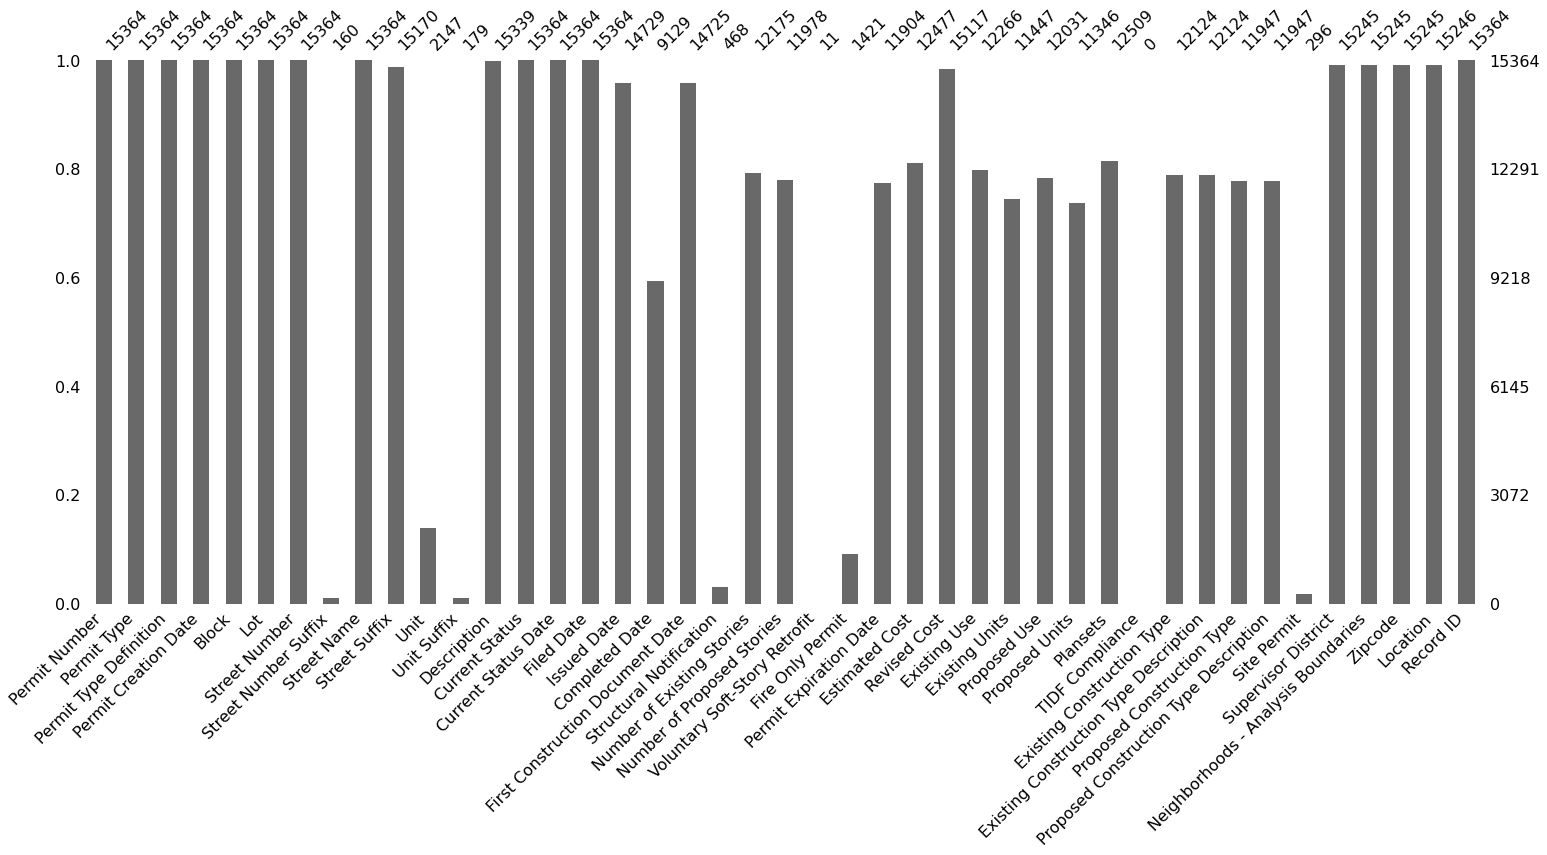

In [9]:
#Visualization of Missing data
import missingno as msno

msno.bar(df.replace('',np.nan))

## Handling Missing Data 

In [102]:
data.columns[df.isna().any()]

Index(['Street Number Suffix', 'Street Suffix', 'Unit', 'Unit Suffix',
       'Description', 'Issued Date', 'Completed Date',
       'First Construction Document Date', 'Structural Notification',
       'Number of Existing Stories', 'Number of Proposed Stories',
       'Voluntary Soft-Story Retrofit', 'Fire Only Permit',
       'Permit Expiration Date', 'Estimated Cost', 'Revised Cost',
       'Existing Use', 'Existing Units', 'Proposed Use', 'Proposed Units',
       'Plansets', 'TIDF Compliance', 'Existing Construction Type',
       'Existing Construction Type Description', 'Proposed Construction Type',
       'Proposed Construction Type Description', 'Site Permit',
       'Supervisor District', 'Neighborhoods - Analysis Boundaries', 'Zipcode',
       'Location'],
      dtype='object')

These are the columns that contains missing data, we will go over them one by one

In [410]:
data_ = data.drop(columns=['Voluntary Soft-Story Retrofit','TIDF Compliance','Unit Suffix'])

Columns are dropped as they have little or zero values

In [103]:
#viewing data where Street Number Suffix is null
data_[df['Street Number Suffix'].isna()]

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505000000.0,4,sign - erect,05/06/2015,326,23,140,,Ellis,St,...,3,constr type 3,,,,3,Tenderloin,94102,"(37.785719256680785, -122.40852313194863)",1.380610e+12
1,201604000000.0,4,sign - erect,04/19/2016,306,7,440,,Geary,St,...,3,constr type 3,,,,3,Tenderloin,94102,"(37.78733980600732, -122.41063199757738)",1.420160e+12
2,201605000000.0,3,additions alterations or repairs,05/27/2016,595,203,1647,,Pacific,Av,...,1,constr type 1,1,constr type 1,,3,Russian Hill,94109,"(37.7946573324287, -122.42232562979227)",1.424860e+12
3,201611000000.0,8,otc alterations permit,11/07/2016,156,11,1230,,Pacific,Av,...,5,wood frame (5),5,wood frame (5),,3,Nob Hill,94109,"(37.79595867909168, -122.41557405519474)",1.443570e+12
4,201611000000.0,6,demolitions,11/28/2016,342,1,950,,Market,St,...,3,constr type 3,,,,6,Tenderloin,94102,"(37.78315261897309, -122.40950883997789)",1.445480e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15359,201306000000.0,8,otc alterations permit,06/11/2013,7104,018B,162,,Farallones,St,...,5,wood frame (5),5,wood frame (5),,11,Oceanview/Merced/Ingleside,94112,"(37.7143177382725, -122.45793648914099)",1.307690e+12
15360,201306000000.0,8,otc alterations permit,06/11/2013,3609,81,3549,,20th,St,...,5,wood frame (5),5,wood frame (5),,9,Mission,94110,"(37.7583635958755, -122.42012861020109)",1.307690e+12
15361,201306000000.0,8,otc alterations permit,06/11/2013,3609,81,3551,,20th,St,...,5,wood frame (5),5,wood frame (5),,9,Mission,94110,"(37.7583635958755, -122.42012861020109)",1.307690e+12
15362,201306000000.0,8,otc alterations permit,06/11/2013,4260,13,2334,,25th,St,...,5,wood frame (5),5,wood frame (5),,10,Potrero Hill,94107,"(37.752135529825054, -122.40206132582264)",1.307690e+12


Looking at missing data Street Number Suffix

<AxesSubplot:xlabel='Street Number Suffix', ylabel='count'>

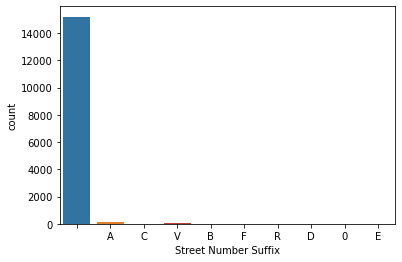

In [412]:
#visualizing category distribution of Street Number Suffix
sns.countplot(x='Street Number Suffix',data=data_)

In [76]:
#grouping dataframe by Street Number Suffix and getting category A
data_.groupby('Street Number Suffix').get_group('A')

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
92,201408000000.0,8,otc alterations permit,08/25/2014,3509,29,63,A,Grace,St,...,5.0,wood frame (5),5.0,wood frame (5),,6.0,South of Market,94103.0,"(37.774944547030586, -122.41443674356925)",1.353300e+12
164,201707000000.0,2,new construction wood frame,07/14/2017,1193,48,2150,A,Hayes,St,...,,,5.0,wood frame (5),Y,5.0,Lone Mountain/USF,94117.0,"(37.77347316353236, -122.45200535060522)",1.470590e+11
273,M829468,8,otc alterations permit,09/08/2017,3702,390,33,A,08th,St,...,,,,,,6.0,South of Market,94103.0,"(37.77850219390184, -122.413426065671)",1.478110e+12
639,201301000000.0,8,otc alterations permit,01/03/2013,535,29,2327,A,Filbert,St,...,5.0,wood frame (5),5.0,wood frame (5),,2.0,Marina,94123.0,"(37.797469404717916, -122.43776016525479)",1.292270e+12
907,201301000000.0,8,otc alterations permit,01/07/2013,3556,30,261,A,Dolores,St,...,5.0,wood frame (5),5.0,wood frame (5),,8.0,Mission,94103.0,"(37.765326601968276, -122.42589274563393)",1.292540e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14799,201306000000.0,8,otc alterations permit,06/06/2013,6543,36,4511,A,25th,St,...,5.0,wood frame (5),5.0,wood frame (5),,8.0,Noe Valley,94114.0,"(37.749134102127606, -122.43947980811033)",1.307100e+12
14864,M399907,8,otc alterations permit,06/06/2013,2698,14,4416,A,20th,St,...,,,,,,8.0,Castro/Upper Market,94114.0,"(37.75777603992102, -122.4372350548249)",1.307170e+12
15183,M400647,8,otc alterations permit,06/10/2013,3568,29,130,A,Albion,St,...,,,,,,8.0,Mission,94110.0,"(37.764306011842955, -122.42311573536443)",1.307500e+12
15185,201306000000.0,8,otc alterations permit,06/10/2013,5643,23,15,A,Heyman,Av,...,5.0,wood frame (5),5.0,wood frame (5),,9.0,Bernal Heights,94110.0,"(37.742116643486085, -122.42007192054747)",1.307500e+12


-> I can infere the missing data in this column are due to the fact that those street don't have suffixes, hence it is MNAR   
-> we will solve by making a new category 'None' to account for the null values

<AxesSubplot:xlabel='Street Number Suffix', ylabel='count'>

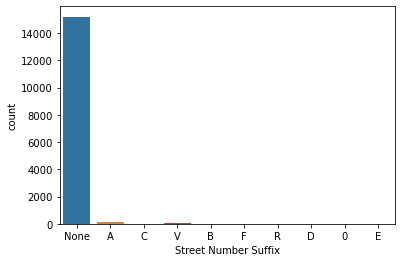

In [413]:
data_1 = data_['Street Number Suffix'].replace('','None')
data_1 = pd.concat([data_.drop(columns='Street Number Suffix'),data_1],axis=1)
sns.countplot(x='Street Number Suffix',data=data_1)

Made New Category 'None' in street number suffix and replaced null values with it

In [414]:
data_1.loc[data_1.Unit != '','Block':]

,Block,Lot,Street Number,Street Name,Street Suffix,Unit,Description,Current Status,Current Status Date,Filed Date,...,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID,Street Number Suffix
1,306,7,440,Geary,St,0,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,...,constr type 3,,,,3,Tenderloin,94102,"(37.78733980600732, -122.41063199757738)",1.420160e+12,None
3,156,11,1230,Pacific,Av,0,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,...,wood frame (5),5,wood frame (5),,3,Nob Hill,94109,"(37.79595867909168, -122.41557405519474)",1.443570e+12,None
6,1739,20,1291,11th,Av,0,re-roofing,complete,07/12/2017,06/30/2017,...,wood frame (5),5,wood frame (5),,5,Inner Sunset,94122,"(37.764145640138565, -122.46875112470363)",1.468970e+12,None
15,243,43,840,Powell,St,301,street space,issued,07/27/2017,07/27/2017,...,,,,,3,Chinatown,94108,"(37.7926690651263, -122.40883941791454)",1.472090e+11,None
17,3621,97,3707,21st,St,0,street space & sidewalk repair,issued,07/27/2017,07/27/2017,...,,,,,8,Noe Valley,94114,"(37.75607840165479, -122.43041143390109)",1.472180e+12,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15318,3641,48,932,Shotwell,St,0,convert exiting 2nd floor closet to 1/2 half b...,complete,01/03/2014,06/11/2013,...,wood frame (5),5,wood frame (5),,9,Mission,94110,"(37.752950200229705, -122.4155330331971)",1.307640e+12,None
15324,3501,1,2,Guerrero,St,0,to renew final inspection for work approved un...,complete,12/06/2013,06/11/2013,...,constr type 1,1,constr type 1,,8,Mission,94103,"(37.77034825813612, -122.42496360709316)",1.307650e+12,None
15326,196,25,30,Hotaling,Pl,0,installation of light fixturs in open office a...,complete,06/18/2013,06/11/2013,...,constr type 1,1,constr type 1,,3,Chinatown,94111,"(37.796012143728916, -122.40255786415696)",1.307650e+12,None
15330,1062,43,130,Palm,Av,0,add 22 fire sprinklers at new apt. ref pa# 20...,complete,07/15/2014,06/11/2013,...,wood frame (5),5,wood frame (5),,2,Presidio Heights,94118,"(37.783022398655305, -122.45751032321567)",1.307650e+12,None


Checking Unit and Unit Suffix Features

In [415]:
data_2 = data_1['Unit'].replace('',0.0)
data_2 = pd.concat([data_1.drop(columns='Unit'),data_2],axis=1)
data_2['Unit'] = data_2['Unit'].astype(float)

Assumption made is missing values for Unit features are 0.0 which is the mode of the Feature. Missing data is MNAR cause there it isn't at random the missing values are cause of the absence of Unit values MNAR

In [416]:
data_2.loc[:,:'Unit':]

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,...,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID,Street Number Suffix,Unit
0,201505000000.0,4,sign - erect,05/06/2015,326,23,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",...,,,,3,Tenderloin,94102,"(37.785719256680785, -122.40852313194863)",1.380610e+12,None,0.0
1,201604000000.0,4,sign - erect,04/19/2016,306,7,440,Geary,St,remove (e) awning and associated signs.,...,,,,3,Tenderloin,94102,"(37.78733980600732, -122.41063199757738)",1.420160e+12,None,0.0
2,201605000000.0,3,additions alterations or repairs,05/27/2016,595,203,1647,Pacific,Av,installation of separating wall,...,1,constr type 1,,3,Russian Hill,94109,"(37.7946573324287, -122.42232562979227)",1.424860e+12,None,0.0
3,201611000000.0,8,otc alterations permit,11/07/2016,156,11,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,...,5,wood frame (5),,3,Nob Hill,94109,"(37.79595867909168, -122.41557405519474)",1.443570e+12,None,0.0
4,201611000000.0,6,demolitions,11/28/2016,342,1,950,Market,St,demolish retail/office/commercial 3-story buil...,...,,,,6,Tenderloin,94102,"(37.78315261897309, -122.40950883997789)",1.445480e+11,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15359,201306000000.0,8,otc alterations permit,06/11/2013,7104,018B,162,Farallones,St,"install finishing plumbing, finish electrical,...",...,5,wood frame (5),,11,Oceanview/Merced/Ingleside,94112,"(37.7143177382725, -122.45793648914099)",1.307690e+12,None,0.0
15360,201306000000.0,8,otc alterations permit,06/11/2013,3609,81,3549,20th,St,revision to 201208288466 to add a toilet in th...,...,5,wood frame (5),,9,Mission,94110,"(37.7583635958755, -122.42012861020109)",1.307690e+12,None,0.0
15361,201306000000.0,8,otc alterations permit,06/11/2013,3609,81,3551,20th,St,revision to 201208288466 to add a toilet in th...,...,5,wood frame (5),,9,Mission,94110,"(37.7583635958755, -122.42012861020109)",1.307690e+12,None,0.0
15362,201306000000.0,8,otc alterations permit,06/11/2013,4260,13,2334,25th,St,"interior renovation unit #2334, new kitchen fi...",...,5,wood frame (5),,10,Potrero Hill,94107,"(37.752135529825054, -122.40206132582264)",1.307690e+12,None,0.0


No apparent relationship with other features

In [417]:
df['Unit Suffix'][df['Unit Suffix'].notna()].value_counts()

C             27
A             21
B             16
COMML         14
F             11
D             10
E              7
HOA            6
FRONT          4
FRONT BLDG     4
H              4
J              4
W              3
UPPER          3
COMMERCIAL     2
G              2
C132           2
RETAIL 1       2
RESIDL 3/F     2
P              2
PH2B           2
PH             2
REAR           1
FRONT UNIT     1
RESIDENTIA     1
LOWER          1
1A-4           1
REAR BLDG      1
#R-2           1
THEATRE        1
BLDG. 3        1
RESDL/REAR     1
T              1
REAR UNIT      1
BLDG C         1
RESIDENCE      1
PH-4           1
PIER 1         1
PIER 2         1
PIER 3         1
BLDG A         1
BLDG B         1
BLDG D         1
BLDG E         1
OFFICE 2/F     1
RESID'L        1
RES'L          1
B20H           1
L              1
BLDG 1         1
N              1
Name: Unit Suffix, dtype: int64

In [128]:
data_2.loc[:,'Issued Date':]

,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,11/09/2015,,11/09/2015,,6,,,,11/03/2016,4000,...,3,constr type 3,,,,3,Tenderloin,94102,"(37.785719256680785, -122.40852313194863)",1.380610e+12
1,08/03/2017,,08/03/2017,,7,,,,12/03/2017,1,...,3,constr type 3,,,,3,Tenderloin,94102,"(37.78733980600732, -122.41063199757738)",1.420160e+12
2,,,,,6,6,,,,20000,...,1,constr type 1,1,constr type 1,,3,Russian Hill,94109,"(37.7946573324287, -122.42232562979227)",1.424860e+12
3,07/18/2017,07/24/2017,07/18/2017,,2,2,,,07/13/2018,2000,...,5,wood frame (5),5,wood frame (5),,3,Nob Hill,94109,"(37.79595867909168, -122.41557405519474)",1.443570e+12
4,12/01/2017,,11/20/2017,,3,,,,12/01/2018,100000,...,3,constr type 3,,,,6,Tenderloin,94102,"(37.78315261897309, -122.40950883997789)",1.445480e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15359,06/11/2013,,06/11/2013,,2,2,,,06/06/2014,8000,...,5,wood frame (5),5,wood frame (5),,11,Oceanview/Merced/Ingleside,94112,"(37.7143177382725, -122.45793648914099)",1.307690e+12
15360,06/18/2013,08/30/2013,06/18/2013,,2,2,,,06/13/2014,2000,...,5,wood frame (5),5,wood frame (5),,9,Mission,94110,"(37.7583635958755, -122.42012861020109)",1.307690e+12
15361,06/18/2013,08/30/2013,06/18/2013,,2,2,,,06/13/2014,2000,...,5,wood frame (5),5,wood frame (5),,9,Mission,94110,"(37.7583635958755, -122.42012861020109)",1.307690e+12
15362,06/11/2013,08/05/2013,06/11/2013,,2,2,,,06/06/2014,26000,...,5,wood frame (5),5,wood frame (5),,10,Potrero Hill,94107,"(37.752135529825054, -122.40206132582264)",1.307690e+12


In [419]:
#viewing data for rows where Issued date and First Cons... don't have same values
data_2[data_2['Issued Date'] != data_2['First Construction Document Date']].loc[:,'Issued Date':]

,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,...,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID,Street Number Suffix,Unit
4,12/01/2017,,11/20/2017,,3,,,12/01/2018,100000,100000,...,,,,6,Tenderloin,94102,"(37.78315261897309, -122.40950883997789)",1.445480e+11,None,0.0
152,,,07/07/2017,,,,,07/07/2019,250000,400000,...,,,,6,Treasure Island,94130,"(37.81101341055236, -122.36585271558224)",1.469670e+12,None,0.0
583,08/22/2013,02/04/2015,10/02/2014,Y,2,2,,08/17/2014,12000,26600,...,5,wood frame (5),Y,7,West of Twin Peaks,94127,"(37.73382213394958, -122.46326158518492)",1.292210e+12,None,0.0
767,06/14/2013,04/01/2015,08/16/2013,,,3,,05/29/2016,185000,528451,...,5,wood frame (5),Y,11,Excelsior,94112,"(37.7131015368485, -122.43440876409724)",1.292400e+12,V,0.0
808,10/15/2013,09/16/2015,11/26/2013,Y,2,3,,09/29/2016,90000,265000,...,5,wood frame (5),Y,8,Noe Valley,94131,"(37.745100048535534, -122.4393293596936)",1.292440e+12,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15022,06/07/2013,,,,6,6,,05/22/2016,250000,250000,...,1,constr type 1,,6,Mission,94103,"(37.77129275788976, -122.41990350536491)",1.307340e+12,None,0.0
15041,03/04/2014,03/02/2015,03/21/2014,Y,3,3,,02/27/2015,100000,100000,...,5,wood frame (5),Y,8,Noe Valley,94114,"(37.756184210409, -122.42741502012457)",1.307360e+12,None,0.0
15092,11/13/2013,11/19/2013,09/09/2013,,4,4,Y,11/08/2014,5000,5000,...,3,constr type 3,,2,Russian Hill,94109,"(37.80727775846843, -122.4194770824381)",1.307410e+12,None,0.0
15186,06/11/2013,04/11/2014,06/10/2013,,3,3,,06/06/2014,15000,27000,...,5,wood frame (5),,2,Inner Richmond,94118,"(37.78854597039952, -122.45987954779889)",1.307510e+11,None,0.0


In [420]:
#Converting to datetime
data_2['Issued Date'] = pd.to_datetime(data_2['Issued Date'])
data_2['Completed Date'] = pd.to_datetime(data_2['Completed Date'])
data_2['Permit Expiration Date'] = pd.to_datetime(data_2['Permit Expiration Date'])
data_2['First Construction Document Date'] = pd.to_datetime(data_2['First Construction Document Date'])

In [421]:
#viewing dataframe from issued date column above
data_2.loc[:,'Issued Date':]

,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,...,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID,Street Number Suffix,Unit
0,2015-11-09,NaT,2015-11-09,,6,,,2016-11-03,4000,4000,...,,,,3,Tenderloin,94102,"(37.785719256680785, -122.40852313194863)",1.380610e+12,None,0.0
1,2017-08-03,NaT,2017-08-03,,7,,,2017-12-03,1,500,...,,,,3,Tenderloin,94102,"(37.78733980600732, -122.41063199757738)",1.420160e+12,None,0.0
2,NaT,NaT,NaT,,6,6,,NaT,20000,,...,1,constr type 1,,3,Russian Hill,94109,"(37.7946573324287, -122.42232562979227)",1.424860e+12,None,0.0
3,2017-07-18,2017-07-24,2017-07-18,,2,2,,2018-07-13,2000,2000,...,5,wood frame (5),,3,Nob Hill,94109,"(37.79595867909168, -122.41557405519474)",1.443570e+12,None,0.0
4,2017-12-01,NaT,2017-11-20,,3,,,2018-12-01,100000,100000,...,,,,6,Tenderloin,94102,"(37.78315261897309, -122.40950883997789)",1.445480e+11,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15359,2013-06-11,NaT,2013-06-11,,2,2,,2014-06-06,8000,28000,...,5,wood frame (5),,11,Oceanview/Merced/Ingleside,94112,"(37.7143177382725, -122.45793648914099)",1.307690e+12,None,0.0
15360,2013-06-18,2013-08-30,2013-06-18,,2,2,,2014-06-13,2000,2000,...,5,wood frame (5),,9,Mission,94110,"(37.7583635958755, -122.42012861020109)",1.307690e+12,None,0.0
15361,2013-06-18,2013-08-30,2013-06-18,,2,2,,2014-06-13,2000,2000,...,5,wood frame (5),,9,Mission,94110,"(37.7583635958755, -122.42012861020109)",1.307690e+12,None,0.0
15362,2013-06-11,2013-08-05,2013-06-11,,2,2,,2014-06-06,26000,26000,...,5,wood frame (5),,10,Potrero Hill,94107,"(37.752135529825054, -122.40206132582264)",1.307690e+12,None,0.0


In [422]:
data_2[data_2['Structural Notification']!= ''].loc[:,'Structural Notification':]

data_2['Structural Notification'].value_counts()

     14896
Y      468
Name: Structural Notification, dtype: int64

We will replace missing structural notification values with N, MNAR 

In [423]:
data_3 = data_2['Structural Notification'].replace(to_replace='',value='N')
data_3 = pd.concat([data_2.drop(columns='Structural Notification'),data_3],axis=1)

In [424]:
#checking type of column
data_3['Structural Notification'].dtype

dtype('O')

In [425]:
data_3.columns

Index(['Permit Number', 'Permit Type', 'Permit Type Definition',
       'Permit Creation Date', 'Block', 'Lot', 'Street Number', 'Street Name',
       'Street Suffix', 'Description', 'Current Status', 'Current Status Date',
       'Filed Date', 'Issued Date', 'Completed Date',
       'First Construction Document Date', 'Number of Existing Stories',
       'Number of Proposed Stories', 'Fire Only Permit',
       'Permit Expiration Date', 'Estimated Cost', 'Revised Cost',
       'Existing Use', 'Existing Units', 'Proposed Use', 'Proposed Units',
       'Plansets', 'Existing Construction Type',
       'Existing Construction Type Description', 'Proposed Construction Type',
       'Proposed Construction Type Description', 'Site Permit',
       'Supervisor District', 'Neighborhoods - Analysis Boundaries', 'Zipcode',
       'Location', 'Record ID', 'Street Number Suffix', 'Unit',
       'Structural Notification'],
      dtype='object')

In [ ]:
data_3.loc[:'Number of Existing Stories']

In [281]:
data_3['Number of Existing Stories'].value_counts()

2     4468
3     3367
      3189
4     1084
1      729
5      331
6      266
7      235
8      148
11     127
12     123
9       93
10      84
16      68
38      62
18      60
40      53
22      52
15      52
23      48
20      46
17      43
26      40
30      38
25      36
0       35
13      35
31      34
19      34
43      33
48      32
14      27
42      26
27      25
33      24
24      23
21      22
58      20
52      18
45      16
39      16
34      13
36      13
35      13
37      13
32      11
28      11
29       7
53       5
60       5
50       5
46       2
55       1
63       1
41       1
47       1
Name: Number of Existing Stories, dtype: int64

In [426]:
data_4 = data_3['Number of Existing Stories'].replace('',data_3['Number of Existing Stories'][data_3['Number of Existing Stories']!= ''].astype(int).median())
data_4 = pd.concat([data_3.drop(columns='Number of Existing Stories'),data_4],axis=1)
data_4['Number of Existing Stories'].isna().sum()

0

Missing Values for Number of Existing Stories has been replaced with median

<AxesSubplot:>

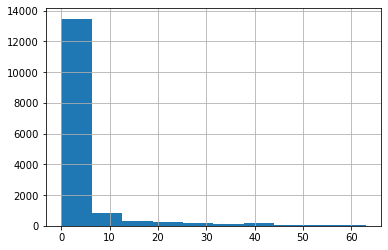

In [427]:
data_4['Number of Existing Stories'].hist()

In [428]:
data_4['Description']

0        ground fl facade: to erect illuminated, electr...
1                  remove (e) awning and associated signs.
2                          installation of separating wall
3                 repair dryrot & stucco at front of bldg.
4        demolish retail/office/commercial 3-story buil...
                               ...                        
15359    install finishing plumbing, finish electrical,...
15360    revision to 201208288466 to add a toilet in th...
15361    revision to 201208288466 to add a toilet in th...
15362    interior renovation unit #2334, new kitchen fi...
15363                                  street space permit
Name: Description, Length: 15364, dtype: object

<AxesSubplot:>

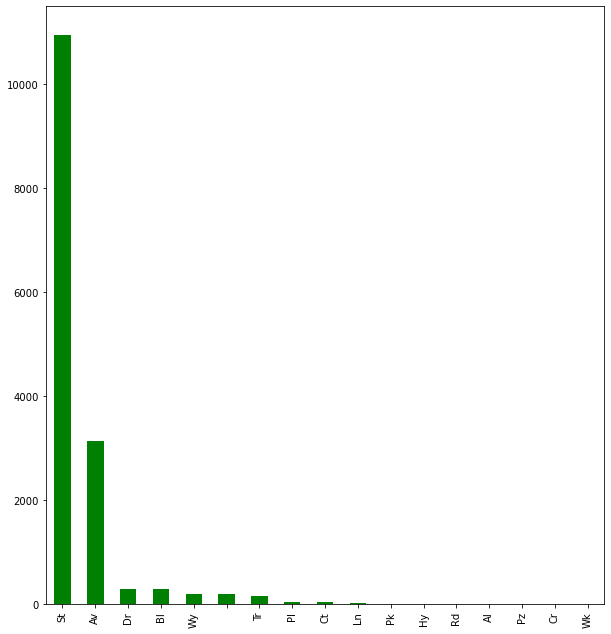

In [301]:
#visualizing distribution of categories in column
data_4['Street Suffix'].value_counts().plot(kind='bar',color='g',figsize=(10,11))

We will replace null values with the mode of the data MCAR

In [17]:
data_4['Street Suffix'].mode()

0    St
Name: Street Suffix, dtype: object

In [429]:
data_5 = data_4['Street Suffix'].replace('','St')
data_5 = pd.concat([data_4.drop(columns='Street Suffix'),data_5],axis=1)

Null Values of Street Suffix are replaced with mode which is 'St'

In [430]:
data_5['Street Suffix'].isna().sum()

0

In [431]:
#cheking null values remaining in data
df_check = data_5.replace('',np.nan)
df_check.isna().sum()

Permit Number                                 0
Permit Type                                   0
Permit Type Definition                        0
Permit Creation Date                          0
Block                                         0
Lot                                           0
Street Number                                 0
Street Name                                   0
Description                                  25
Current Status                                0
Current Status Date                           0
Filed Date                                    0
Issued Date                                 635
Completed Date                             6235
First Construction Document Date            639
Number of Proposed Stories                 3386
Fire Only Permit                          13943
Permit Expiration Date                     3460
Estimated Cost                             2887
Revised Cost                                247
Existing Use                            

In [432]:
#filling datetime columns with ffill and bfill
data_5['Issued Date'] = data_5['Issued Date'].ffill().bfill()
data_5['Completed Date'] = data_5['Completed Date'].ffill().bfill()
data_5['Permit Expiration Date'] = data_5['Permit Expiration Date'].ffill().bfill()
data_5['First Construction Document Date'] = data_5['First Construction Document Date'].ffill().bfill()

In [433]:
#creating new columns from location
data_5[['longitude','latitude']] = data_5['Location'].str.strip('()').str.split(',',1,expand=True)

In [434]:
df_check = data_5.replace('',np.nan)
df_check.isna().sum()

Permit Number                                 0
Permit Type                                   0
Permit Type Definition                        0
Permit Creation Date                          0
Block                                         0
Lot                                           0
Street Number                                 0
Street Name                                   0
Description                                  25
Current Status                                0
Current Status Date                           0
Filed Date                                    0
Issued Date                                   0
Completed Date                                0
First Construction Document Date              0
Number of Proposed Stories                 3386
Fire Only Permit                          13943
Permit Expiration Date                        0
Estimated Cost                             2887
Revised Cost                                247
Existing Use                            

In [435]:
#creating copy of dataframe where null values are recognized to simplify process of treating missing values
df = df_check.copy()

In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15364 entries, 0 to 15363
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Permit Number                           15364 non-null  object        
 1   Permit Type                             15364 non-null  int64         
 2   Permit Type Definition                  15364 non-null  object        
 3   Permit Creation Date                    15364 non-null  object        
 4   Block                                   15364 non-null  object        
 5   Lot                                     15364 non-null  object        
 6   Street Number                           15364 non-null  int64         
 7   Street Number Suffix                    15364 non-null  object        
 8   Street Name                             15364 non-null  object        
 9   Street Suffix                           15364 non-

In [436]:
#casting the following columns to floating point type
df[['Record ID','latitude','Zipcode','longitude','Supervisor District']] = df[['Record ID','latitude','Zipcode','longitude','Supervisor District']].astype(float)

In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15364 entries, 0 to 15363
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Permit Number                           15364 non-null  object        
 1   Permit Type                             15364 non-null  int64         
 2   Permit Type Definition                  15364 non-null  object        
 3   Permit Creation Date                    15364 non-null  object        
 4   Block                                   15364 non-null  object        
 5   Lot                                     15364 non-null  object        
 6   Street Number                           15364 non-null  int64         
 7   Street Number Suffix                    15364 non-null  object        
 8   Street Name                             15364 non-null  object        
 9   Street Suffix                           15364 non-

In [437]:
#sampling random sequences to fill missing values
random_record = df['Record ID'].drop(df[df['Record ID'].isna()].index).sample(df['Record ID'].isna().sum(),random_state=0)
random_long = df['longitude'].drop(df[df['longitude'].isna()].index).sample(df['longitude'].isna().sum(),random_state=0)
random_lat = df['latitude'].drop(df[df['latitude'].isna()].index).sample(df['latitude'].isna().sum(),random_state=0)
random_zip = df['Zipcode'].drop(df[df['Zipcode'].isna()].index).sample(df['Zipcode'].isna().sum(),random_state=0)
random_dist = df['Supervisor District'].drop(df[df['Supervisor District'].isna()].index).sample(df['Supervisor District'].isna().sum(),random_state=0)

#getting indexes of missing rows
random_record.index = df[df['Record ID'].isna()].index
random_long.index = df[df['longitude'].isna()].index
random_lat.index = df[df['latitude'].isna()].index
random_zip.index = df[df['Zipcode'].isna()].index
random_dist.index = df[df['Supervisor District'].isna()].index

#filling missing data with random samples created
df.loc[df['Record ID'].isna(),'Record ID']=random_record
df.loc[df['longitude'].isna(),'longitude']=random_long
df.loc[df['latitude'].isna(),'latitude']=random_lat
df.loc[df['Zipcode'].isna(),'Zipcode']=random_zip
df.loc[df['Supervisor District'].isna(),'Supervisor District']=random_dist

Handled missing data in 'Record ID','longitude','latitude','Zipcode''Supervisor District' columns, through random sample input

In [438]:
#dropping location column
df_ = df.drop(columns="Location")
df_.isna().sum()

Permit Number                                 0
Permit Type                                   0
Permit Type Definition                        0
Permit Creation Date                          0
Block                                         0
Lot                                           0
Street Number                                 0
Street Name                                   0
Description                                  25
Current Status                                0
Current Status Date                           0
Filed Date                                    0
Issued Date                                   0
Completed Date                                0
First Construction Document Date              0
Number of Proposed Stories                 3386
Fire Only Permit                          13943
Permit Expiration Date                        0
Estimated Cost                             2887
Revised Cost                                247
Existing Use                            

In [439]:
df_['Proposed Use'].value_counts()

1 family dwelling      3757
apartments             2805
office                 1911
2 family dwelling      1707
retail sales            457
                       ... 
dance hall                1
library                   1
storage tanks             1
day care home lt 7        1
chemical processing       1
Name: Proposed Use, Length: 69, dtype: int64

In [440]:
df_1 = df_['Site Permit'].replace(np.nan,'N')
df_1 = pd.concat([df_.drop(columns='Site Permit'),df_1],axis=1)

Replacing 'Site Permit' Column's null values with new category 'N' for No

In [441]:
df_1['Site Permit'].value_counts()

N    15068
Y      296
Name: Site Permit, dtype: int64

In [442]:
df_1.isna().sum()

Permit Number                                 0
Permit Type                                   0
Permit Type Definition                        0
Permit Creation Date                          0
Block                                         0
Lot                                           0
Street Number                                 0
Street Name                                   0
Description                                  25
Current Status                                0
Current Status Date                           0
Filed Date                                    0
Issued Date                                   0
Completed Date                                0
First Construction Document Date              0
Number of Proposed Stories                 3386
Fire Only Permit                          13943
Permit Expiration Date                        0
Estimated Cost                             2887
Revised Cost                                247
Existing Use                            

In [443]:
df_1['Neighborhoods - Analysis Boundaries'].value_counts()

Financial District/South Beach    1611
Mission                           1099
South of Market                    794
Sunset/Parkside                    774
West of Twin Peaks                 734
Castro/Upper Market                712
Pacific Heights                    706
Marina                             689
Noe Valley                         668
Outer Richmond                     538
Nob Hill                           468
North Beach                        440
Bernal Heights                     440
Bayview Hunters Point              434
Inner Sunset                       433
Haight Ashbury                     407
Tenderloin                         403
Russian Hill                       390
Hayes Valley                       384
Chinatown                          342
Potrero Hill                       340
Presidio Heights                   305
Inner Richmond                     295
Excelsior                          246
Lone Mountain/USF                  244
Western Addition         

In [445]:
df_2 = df_1['Revised Cost'].fillna(df_1['Revised Cost'].median())
df_2 = pd.concat([df_1.drop(columns='Revised Cost'),df_2],axis=1)

Filling missing values of 'Revised cost with median of column

In [478]:
df['Existing Construction Type Description'].mode()[0]

'wood frame (5)'

In [446]:
df_2['Neighborhoods - Analysis Boundaries'].replace(np.nan,df['Neighborhoods - Analysis Boundaries'].mode()[0],inplace=True)
df_2['Proposed Construction Type'].fillna(df['Proposed Construction Type'].mode()[0],inplace=True)
df_2['Existing Construction Type'].fillna(df['Existing Construction Type'].mode()[0],inplace=True)
df_2['Existing Construction Type Description'].fillna(df['Existing Construction Type Description'].mode()[0],inplace=True)
df_2['Proposed Construction Type Description'].fillna(df['Proposed Construction Type Description'].mode()[0],inplace=True)   

Missing values of columns are replaced with the mode of the column

In [447]:
df_2.isna().sum()

Permit Number                                 0
Permit Type                                   0
Permit Type Definition                        0
Permit Creation Date                          0
Block                                         0
Lot                                           0
Street Number                                 0
Street Name                                   0
Description                                  25
Current Status                                0
Current Status Date                           0
Filed Date                                    0
Issued Date                                   0
Completed Date                                0
First Construction Document Date              0
Number of Proposed Stories                 3386
Fire Only Permit                          13943
Permit Expiration Date                        0
Estimated Cost                             2887
Existing Use                               3098
Existing Units                          

In [448]:
df_2['Proposed Use'].value_counts()

1 family dwelling      3757
apartments             2805
office                 1911
2 family dwelling      1707
retail sales            457
                       ... 
dance hall                1
library                   1
storage tanks             1
day care home lt 7        1
chemical processing       1
Name: Proposed Use, Length: 69, dtype: int64

In [449]:
#filling null values with 0.0
df_2['Number of Proposed Stories'].fillna(0.0,inplace=True)
df_2['Existing Units'].fillna(0.0,inplace=True)
df_2['Proposed Units'].fillna(0.0,inplace=True)
df_2['Plansets'].fillna(0.0,inplace=True)

#filling null values with median
df_2['Estimated Cost'].fillna(df_2['Estimated Cost'].median(),inplace=True)
df_2['Number of Existing Stories'].fillna(df_2['Number of Existing Stories'].median(),inplace=True)

#filling null values in Fire Only Permit with None
df_2['Proposed Use'].fillna('None',inplace=True)
df_2['Existing Use'].fillna('None',inplace=True)

#filling null values with N
df_2['Fire Only Permit'].fillna('N',inplace=True)

Filling missing values of columns with various techniques

In [512]:
df

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Record ID,longitude,latitude
0,201505000000.0,4,sign - erect,05/06/2015,326,23,140,None,Ellis,St,...,constr type 3,5.0,wood frame (5),N,3.0,Tenderloin,94102.0,1.380610e+12,37.785719,-122.408523
1,201604000000.0,4,sign - erect,04/19/2016,306,7,440,None,Geary,St,...,constr type 3,5.0,wood frame (5),N,3.0,Tenderloin,94102.0,1.420160e+12,37.787340,-122.410632
2,201605000000.0,3,additions alterations or repairs,05/27/2016,595,203,1647,None,Pacific,Av,...,constr type 1,1.0,constr type 1,N,3.0,Russian Hill,94109.0,1.424860e+12,37.794657,-122.422326
3,201611000000.0,8,otc alterations permit,11/07/2016,156,11,1230,None,Pacific,Av,...,wood frame (5),5.0,wood frame (5),N,3.0,Nob Hill,94109.0,1.443570e+12,37.795959,-122.415574
4,201611000000.0,6,demolitions,11/28/2016,342,1,950,None,Market,St,...,constr type 3,5.0,wood frame (5),N,6.0,Tenderloin,94102.0,1.445480e+11,37.783153,-122.409509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15359,201306000000.0,8,otc alterations permit,06/11/2013,7104,018B,162,None,Farallones,St,...,wood frame (5),5.0,wood frame (5),N,11.0,Oceanview/Merced/Ingleside,94112.0,1.307690e+12,37.714318,-122.457936
15360,201306000000.0,8,otc alterations permit,06/11/2013,3609,81,3549,None,20th,St,...,wood frame (5),5.0,wood frame (5),N,9.0,Mission,94110.0,1.307690e+12,37.758364,-122.420129
15361,201306000000.0,8,otc alterations permit,06/11/2013,3609,81,3551,None,20th,St,...,wood frame (5),5.0,wood frame (5),N,9.0,Mission,94110.0,1.307690e+12,37.758364,-122.420129
15362,201306000000.0,8,otc alterations permit,06/11/2013,4260,13,2334,None,25th,St,...,wood frame (5),5.0,wood frame (5),N,10.0,Potrero Hill,94107.0,1.307690e+12,37.752136,-122.402061


In [450]:
df_3 = df_2.drop(labels=df_2[df_2['Description'].isna()].index,axis=0)

Rows with Null values in description column are dropped

In [451]:
df_3.isna().sum()

Permit Number                             0
Permit Type                               0
Permit Type Definition                    0
Permit Creation Date                      0
Block                                     0
Lot                                       0
Street Number                             0
Street Name                               0
Description                               0
Current Status                            0
Current Status Date                       0
Filed Date                                0
Issued Date                               0
Completed Date                            0
First Construction Document Date          0
Number of Proposed Stories                0
Fire Only Permit                          0
Permit Expiration Date                    0
Estimated Cost                            0
Existing Use                              0
Existing Units                            0
Proposed Use                              0
Proposed Units                  

In [452]:
df_3.reset_index(drop=True,inplace=True)
df_3

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Description,Current Status,...,Record ID,Street Number Suffix,Unit,Structural Notification,Number of Existing Stories,Street Suffix,longitude,latitude,Site Permit,Revised Cost
0,201505000000.0,4,sign - erect,05/06/2015,326,23,140,Ellis,"ground fl facade: to erect illuminated, electr...",expired,...,1.380610e+12,None,0.0,N,6.0,St,37.785719,-122.408523,N,4000.0
1,201604000000.0,4,sign - erect,04/19/2016,306,7,440,Geary,remove (e) awning and associated signs.,issued,...,1.420160e+12,None,0.0,N,7.0,St,37.787340,-122.410632,N,500.0
2,201605000000.0,3,additions alterations or repairs,05/27/2016,595,203,1647,Pacific,installation of separating wall,withdrawn,...,1.424860e+12,None,0.0,N,6.0,Av,37.794657,-122.422326,N,5000.0
3,201611000000.0,8,otc alterations permit,11/07/2016,156,11,1230,Pacific,repair dryrot & stucco at front of bldg.,complete,...,1.443570e+12,None,0.0,N,2.0,Av,37.795959,-122.415574,N,2000.0
4,201611000000.0,6,demolitions,11/28/2016,342,1,950,Market,demolish retail/office/commercial 3-story buil...,issued,...,1.445480e+11,None,0.0,N,3.0,St,37.783153,-122.409509,N,100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15334,201306000000.0,8,otc alterations permit,06/11/2013,7104,018B,162,Farallones,"install finishing plumbing, finish electrical,...",issued,...,1.307690e+12,None,0.0,N,2.0,St,37.714318,-122.457936,N,28000.0
15335,201306000000.0,8,otc alterations permit,06/11/2013,3609,81,3549,20th,revision to 201208288466 to add a toilet in th...,complete,...,1.307690e+12,None,0.0,N,2.0,St,37.758364,-122.420129,N,2000.0
15336,201306000000.0,8,otc alterations permit,06/11/2013,3609,81,3551,20th,revision to 201208288466 to add a toilet in th...,complete,...,1.307690e+12,None,0.0,N,2.0,St,37.758364,-122.420129,N,2000.0
15337,201306000000.0,8,otc alterations permit,06/11/2013,4260,13,2334,25th,"interior renovation unit #2334, new kitchen fi...",complete,...,1.307690e+12,None,0.0,N,2.0,St,37.752136,-122.402061,N,26000.0


## Synthesizing New Columns 

In [453]:
dataE = df_3.copy()

In [454]:
dataE.drop_duplicates(keep='first',inplace=True)
dataE.reset_index(drop=True,inplace=True)
dataE.shape

(15325, 41)

In [43]:
dataE.columns

Index(['Permit Number', 'Permit Type', 'Permit Type Definition',
       'Permit Creation Date', 'Block', 'Lot', 'Street Number',
       'Street Number Suffix', 'Street Name', 'Street Suffix', 'Unit',
       'Description', 'Current Status', 'Current Status Date', 'Filed Date',
       'Issued Date', 'Completed Date', 'First Construction Document Date',
       'Structural Notification', 'Number of Existing Stories',
       'Number of Proposed Stories', 'Fire Only Permit',
       'Permit Expiration Date', 'Estimated Cost', 'Revised Cost',
       'Existing Use', 'Existing Units', 'Proposed Use', 'Proposed Units',
       'Plansets', 'Existing Construction Type',
       'Existing Construction Type Description', 'Proposed Construction Type',
       'Proposed Construction Type Description', 'Site Permit',
       'Supervisor District', 'Neighborhoods - Analysis Boundaries', 'Zipcode',
       'Record ID', 'longitude', 'latitude'],
      dtype='object')

In [44]:
dataE.drop(columns='Permit Number',inplace=True)

Column Permit Number is dropped as it contains unique values for each row 

In [145]:
dataE['Permit Type'].value_counts()

8    13856
3     1006
4      322
6       44
2       38
7       35
5       20
1       18
Name: Permit Type, dtype: int64

Categories are not arranged in order

<AxesSubplot:xlabel='Permit Type', ylabel='count'>

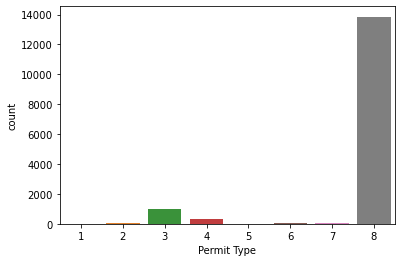

In [73]:
sns.countplot(x='Permit Type',data=dataE)

In [76]:
dataE['Permit Type Definition'].value_counts()

otc alterations permit                 13856
additions alterations or repairs        1006
sign - erect                             322
demolitions                               44
new construction wood frame               38
wall or painted sign                      35
grade or quarry or fill or excavate       20
new construction                          18
Name: Permit Type Definition, dtype: int64

Categorical Variable to be encoded

In [88]:
dataE['Current Status Date']

0        12/21/2017
1        08/03/2017
2        09/26/2017
3        07/24/2017
4        12/01/2017
            ...    
15359    06/11/2013
15360    08/30/2013
15361    08/30/2013
15362    08/05/2013
15363    06/11/2013
Name: Current Status Date, Length: 15339, dtype: object

Some Datetime columns have not been casted to datetime type

In [455]:
#casting columns to datetime
dataE['Permit Creation Date']= pd.to_datetime(dataE['Permit Creation Date'])
dataE['Current Status Date']= pd.to_datetime(dataE['Current Status Date'])
dataE['Filed Date']= pd.to_datetime(dataE['Filed Date'])

In [456]:
#Dealing With Datetime Columns, Extracting Features from datetime columns

for col in dataE.select_dtypes('datetime64[ns]').columns:
    dataE[f'{col} Day'] = dataE[col].dt.day
    dataE[f'{col} Month'] = dataE[col].dt.month
    dataE[f'{col} Year'] = dataE[col].dt.year
    dataE[f'{col} Weekday'] = dataE[col].dt.weekday
    dataE[f'{col} Weekofyear'] = dataE[col].dt.weekofyear
    dataE[f'{col} Hour'] = dataE[col].dt.hour

C:\Users\computer world\AppData\Local\Temp\ipykernel_8476\193736621.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dataE[f'{col} Weekofyear'] = dataE[col].dt.weekofyear
C:\Users\computer world\AppData\Local\Temp\ipykernel_8476\193736621.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dataE[f'{col} Weekofyear'] = dataE[col].dt.weekofyear
C:\Users\computer world\AppData\Local\Temp\ipykernel_8476\193736621.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dataE[f'{col} Weekofyear'] = dataE[col].dt.weekofyear
C:\Users\computer world\AppData\Local\Temp\ipykernel_8476\193736621.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dataE[f'{col} Weekofyear'] = d

In [457]:
#Dropping the following datetime columns as useful features have been extracted from them
dataE_ = dataE.drop(columns=['Permit Creation Date',
 'Current Status Date',
 'Filed Date',
 'Issued Date',
 'Completed Date',
 'First Construction Document Date',
 'Permit Expiration Date'])

dataE_.columns

Index(['Permit Number', 'Permit Type', 'Permit Type Definition', 'Block',
       'Lot', 'Street Number', 'Street Name', 'Description', 'Current Status',
       'Number of Proposed Stories', 'Fire Only Permit', 'Estimated Cost',
       'Existing Use', 'Existing Units', 'Proposed Use', 'Proposed Units',
       'Plansets', 'Existing Construction Type',
       'Existing Construction Type Description', 'Proposed Construction Type',
       'Proposed Construction Type Description', 'Supervisor District',
       'Neighborhoods - Analysis Boundaries', 'Zipcode', 'Record ID',
       'Street Number Suffix', 'Unit', 'Structural Notification',
       'Number of Existing Stories', 'Street Suffix', 'longitude', 'latitude',
       'Site Permit', 'Revised Cost', 'Permit Creation Date Day',
       'Permit Creation Date Month', 'Permit Creation Date Year',
       'Permit Creation Date Weekday', 'Permit Creation Date Weekofyear',
       'Permit Creation Date Hour', 'Current Status Date Day',
       'Curre

In [458]:
dataE_['Lot']

0          23
1           7
2         203
3          11
4           1
         ... 
15320    018B
15321      81
15322      81
15323      13
15324      53
Name: Lot, Length: 15325, dtype: object

In [459]:
#Creating Categories from street number
dataE_['Street Number Category'] = 0
dataE_.loc[dataE_['Street Number']<=100, 'Street Number Category'] = 1
dataE_.loc[(dataE_['Street Number']<=500) & (dataE_['Street Number']>100) , 'Street Number Category'] = 2
dataE_.loc[(dataE_['Street Number']<=1000)& (dataE_['Street Number']>500), 'Street Number Category'] = 3
dataE_.loc[dataE_['Street Number']>1000, 'Street Number Category'] = 4

In [460]:
dataE_['Street Number Category'].value_counts()

4    6189
2    4095
3    3081
1    1960
Name: Street Number Category, dtype: int64

In [461]:
#Column is Heavily Skewed to one output will be dropped
dataE_['Street Number Suffix'].value_counts(normalize=True)
dataE_1 = dataE_.drop(columns=['Street Number Suffix'])

In [462]:
dataE_1.loc[:,'Number of Existing Stories':]

,Number of Existing Stories,Street Suffix,longitude,latitude,Site Permit,Revised Cost,Permit Creation Date Day,Permit Creation Date Month,Permit Creation Date Year,Permit Creation Date Weekday,...,First Construction Document Date Weekday,First Construction Document Date Weekofyear,First Construction Document Date Hour,Permit Expiration Date Day,Permit Expiration Date Month,Permit Expiration Date Year,Permit Expiration Date Weekday,Permit Expiration Date Weekofyear,Permit Expiration Date Hour,Street Number Category
0,6.0,St,37.785719,-122.408523,N,4000.0,6,5,2015,2,...,0,46,0,3,11,2016,3,44,0,2
1,7.0,St,37.787340,-122.410632,N,500.0,19,4,2016,1,...,3,31,0,3,12,2017,6,48,0,2
2,6.0,Av,37.794657,-122.422326,N,5000.0,27,5,2016,4,...,3,31,0,3,12,2017,6,48,0,4
3,2.0,Av,37.795959,-122.415574,N,2000.0,7,11,2016,0,...,1,29,0,13,7,2018,4,28,0,4
4,3.0,St,37.783153,-122.409509,N,100000.0,28,11,2016,0,...,0,47,0,1,12,2018,5,48,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15320,2.0,St,37.714318,-122.457936,N,28000.0,11,6,2013,1,...,1,24,0,6,6,2014,4,23,0,2
15321,2.0,St,37.758364,-122.420129,N,2000.0,11,6,2013,1,...,1,25,0,13,6,2014,4,24,0,4
15322,2.0,St,37.758364,-122.420129,N,2000.0,11,6,2013,1,...,1,25,0,13,6,2014,4,24,0,4
15323,2.0,St,37.752136,-122.402061,N,26000.0,11,6,2013,1,...,1,24,0,6,6,2014,4,23,0,4


In [463]:
#Creating New Column from sum of two related columns
dataE_1['Estimated Total Number of Stories'] = dataE_1['Number of Existing Stories'] + dataE_1['Number of Proposed Stories']

In [464]:
dataE_1['Existing Units'].value_counts()

0.0      6353
1.0      3825
2.0      1772
3.0       635
4.0       413
         ... 
289.0       1
174.0       1
257.0       1
154.0       1
245.0       1
Name: Existing Units, Length: 217, dtype: int64

In [465]:
dataE_1['Zipcode'].value_counts()

94110.0    1320
94114.0    1125
94103.0    1009
94109.0     924
94117.0     844
94123.0     794
94115.0     714
94118.0     710
94133.0     674
94122.0     646
94107.0     640
94105.0     613
94112.0     603
94131.0     568
94102.0     566
94121.0     528
94116.0     506
94127.0     458
94111.0     437
94108.0     432
94124.0     357
94104.0     306
94134.0     249
94132.0     228
94158.0      71
94130.0       3
Name: Zipcode, dtype: int64

In [466]:
#Creating column which will be assigned as target variable
dataE_1['Average Cost'] = (dataE_1['Estimated Cost']+dataE_1['Revised Cost'])/2
dataE_1['Average Cost']

0          4000.0
1           250.5
2         12500.0
3          2000.0
4        100000.0
           ...   
15320     18000.0
15321      2000.0
15322      2000.0
15323     26000.0
15324      4500.5
Name: Average Cost, Length: 15325, dtype: float64

Average Cost will be the target column, and features wil be engineered towards it

In [467]:
#Creating change in cost column dervied from subtraction of two related columns
dataE_1['Change in Cost'] = dataE_1['Revised Cost']-dataE_1['Estimated Cost']
dataE_1['Change in Cost']

0            0.0
1          499.0
2       -15000.0
3            0.0
4            0.0
          ...   
15320    20000.0
15321        0.0
15322        0.0
15323        0.0
15324    -8999.0
Name: Change in Cost, Length: 15325, dtype: float64

column to record if the cost of the project has risen or decreased

In [468]:
#Creating another column derived from subtraction of two related columns
dataE_1['Change in construction type'] = dataE_1['Proposed Construction Type'] - dataE_1['Existing Construction Type']
dataE_1['Change in construction type']

0        2.0
1        2.0
2        0.0
3        0.0
4        2.0
        ... 
15320    0.0
15321    0.0
15322    0.0
15323    0.0
15324    0.0
Name: Change in construction type, Length: 15325, dtype: float64

Is it Positive Or negative Change in construction type

In [180]:
dataE_1['Site Permit'].value_counts(normalize=True)

N    0.980768
Y    0.019232
Name: Site Permit, dtype: float64

Most Dont have Site Permit

In [182]:
dataE_1['Supervisor District'].value_counts()

3.0     2354
6.0     2109
8.0     2088
2.0     2074
5.0     1302
9.0     1230
7.0     1132
10.0     923
1.0      900
4.0      715
11.0     512
Name: Supervisor District, dtype: int64

In [184]:
dataE_1['Neighborhoods - Analysis Boundaries'].value_counts()

Financial District/South Beach    1728
Mission                           1095
South of Market                    794
Sunset/Parkside                    773
West of Twin Peaks                 733
Castro/Upper Market                712
Pacific Heights                    705
Marina                             688
Noe Valley                         667
Outer Richmond                     538
Nob Hill                           466
North Beach                        439
Bernal Heights                     439
Bayview Hunters Point              434
Inner Sunset                       431
Haight Ashbury                     407
Tenderloin                         401
Russian Hill                       389
Hayes Valley                       384
Chinatown                          342
Potrero Hill                       339
Presidio Heights                   305
Inner Richmond                     295
Excelsior                          245
Lone Mountain/USF                  244
Western Addition         

In [470]:
dataE_1['Record ID'].unique()
dataE_2 = dataE_1.drop(columns=['Record ID','Block','Lot'])

This column 'Record ID' will be dropped, columns 'Block' and 'Lot'cannot be classified as numerical or categorical

In [471]:
#Creating polar coordinate variables from cartesian longitude and latitude
dataE_2['radius'] = np.sqrt((dataE_2['latitude']**2) + (dataE_2['longitude']**2))
dataE_2['theta'] = np.arctan2(dataE_2['longitude'],dataE_2['latitude'])

In [472]:
#rotation of data to various degrees can provied useful insight here it is (45,30 degrees)
dataE_2['rot_45_x'] = (0.707 * dataE_2['latitude']) + (0.707 * dataE_2['longitude'])
dataE_2['rot_45_y'] = (0.707 * dataE_2['longitude']) + (0.707 * dataE_2['latitude'])
dataE_2['rot_30_x'] = (0.866 * dataE_2['latitude']) + (0.5 * dataE_2['longitude'])
dataE_2['rot_30_y'] = (0.866 * dataE_2['longitude']) + (0.5 * dataE_2['latitude'])

Creating New Columns from latitude and longitude

### Encoding Categorical Variables

In [473]:
dataE_2.columns

Index(['Permit Number', 'Permit Type', 'Permit Type Definition',
       'Street Number', 'Street Name', 'Description', 'Current Status',
       'Number of Proposed Stories', 'Fire Only Permit', 'Estimated Cost',
       'Existing Use', 'Existing Units', 'Proposed Use', 'Proposed Units',
       'Plansets', 'Existing Construction Type',
       'Existing Construction Type Description', 'Proposed Construction Type',
       'Proposed Construction Type Description', 'Supervisor District',
       'Neighborhoods - Analysis Boundaries', 'Zipcode', 'Unit',
       'Structural Notification', 'Number of Existing Stories',
       'Street Suffix', 'longitude', 'latitude', 'Site Permit', 'Revised Cost',
       'Permit Creation Date Day', 'Permit Creation Date Month',
       'Permit Creation Date Year', 'Permit Creation Date Weekday',
       'Permit Creation Date Weekofyear', 'Permit Creation Date Hour',
       'Current Status Date Day', 'Current Status Date Month',
       'Current Status Date Year', 'C

In [474]:
categorical_cols = ['Permit Type Definition','Street Name', 'Street Suffix',
                   'Current Status', 'Structural Notification','Fire Only Permit',
                   'Existing Use','Proposed Use','Existing Construction Type Description',
                   'Proposed Construction Type Description','Site Permit','Neighborhoods - Analysis Boundaries']

In [475]:
dataE_2[categorical_cols+['Average Cost']]

,Permit Type Definition,Street Name,Street Suffix,Current Status,Structural Notification,Fire Only Permit,Existing Use,Proposed Use,Existing Construction Type Description,Proposed Construction Type Description,Site Permit,Neighborhoods - Analysis Boundaries,Average Cost
0,sign - erect,Ellis,St,expired,N,N,tourist hotel/motel,None,constr type 3,wood frame (5),N,Tenderloin,4000.0
1,sign - erect,Geary,St,issued,N,N,tourist hotel/motel,None,constr type 3,wood frame (5),N,Tenderloin,250.5
2,additions alterations or repairs,Pacific,Av,withdrawn,N,N,retail sales,retail sales,constr type 1,constr type 1,N,Russian Hill,12500.0
3,otc alterations permit,Pacific,Av,complete,N,N,1 family dwelling,1 family dwelling,wood frame (5),wood frame (5),N,Nob Hill,2000.0
4,demolitions,Market,St,issued,N,N,retail sales,None,constr type 3,wood frame (5),N,Tenderloin,100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15320,otc alterations permit,Farallones,St,issued,N,N,1 family dwelling,1 family dwelling,wood frame (5),wood frame (5),N,Oceanview/Merced/Ingleside,18000.0
15321,otc alterations permit,20th,St,complete,N,N,2 family dwelling,2 family dwelling,wood frame (5),wood frame (5),N,Mission,2000.0
15322,otc alterations permit,20th,St,complete,N,N,2 family dwelling,2 family dwelling,wood frame (5),wood frame (5),N,Mission,2000.0
15323,otc alterations permit,25th,St,complete,N,N,apartments,apartments,wood frame (5),wood frame (5),N,Potrero Hill,26000.0


In [476]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

encoder = LabelEncoder()
label_categories = ['Permit Type Definition','Street Suffix','Current Status','Existing Construction Type Description','Proposed Construction Type Description','Site Permit','Structural Notification','Fire Only Permit']
dataE_2[label_categories] = dataE_2[label_categories].apply(encoder.fit_transform)

In [477]:
dataE_2[label_categories]

,Permit Type Definition,Street Suffix,Current Status,Existing Construction Type Description,Proposed Construction Type Description,Site Permit,Structural Notification,Fire Only Permit
0,6,12,4,2,4,0,0,0
1,6,12,6,2,4,0,0,0
2,0,1,11,0,0,0,0,0
3,5,1,3,4,4,0,0,0
4,1,12,6,2,4,0,0,0
...,...,...,...,...,...,...,...,...
15320,5,12,6,4,4,0,0,0
15321,5,12,3,4,4,0,0,0
15322,5,12,3,4,4,0,0,0
15323,5,12,3,4,4,0,0,0


In [478]:
from category_encoders import BinaryEncoder

bin_en = BinaryEncoder()
binary_cat = ['Street Name','Existing Use','Proposed Use','Neighborhoods - Analysis Boundaries']
out_encoder = bin_en.fit_transform(dataE_2[binary_cat])

In [479]:
dataE_3 = pd.concat([dataE_2,out_encoder],axis=1)
dataE_3

,Permit Number,Permit Type,Permit Type Definition,Street Number,Street Name,Description,Current Status,Number of Proposed Stories,Fire Only Permit,Estimated Cost,...,Proposed Use_3,Proposed Use_4,Proposed Use_5,Proposed Use_6,Neighborhoods - Analysis Boundaries_0,Neighborhoods - Analysis Boundaries_1,Neighborhoods - Analysis Boundaries_2,Neighborhoods - Analysis Boundaries_3,Neighborhoods - Analysis Boundaries_4,Neighborhoods - Analysis Boundaries_5
0,201505000000.0,4,6,140,Ellis,"ground fl facade: to erect illuminated, electr...",4,0.0,0,4000.0,...,0,0,0,1,0,0,0,0,0,1
1,201604000000.0,4,6,440,Geary,remove (e) awning and associated signs.,6,0.0,0,1.0,...,0,0,0,1,0,0,0,0,0,1
2,201605000000.0,3,0,1647,Pacific,installation of separating wall,11,6.0,0,20000.0,...,0,0,1,0,0,0,0,0,1,0
3,201611000000.0,8,5,1230,Pacific,repair dryrot & stucco at front of bldg.,3,2.0,0,2000.0,...,0,0,1,1,0,0,0,0,1,1
4,201611000000.0,6,1,950,Market,demolish retail/office/commercial 3-story buil...,6,0.0,0,100000.0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15320,201306000000.0,8,5,162,Farallones,"install finishing plumbing, finish electrical,...",6,2.0,0,8000.0,...,0,0,1,1,0,1,0,1,1,0
15321,201306000000.0,8,5,3549,20th,revision to 201208288466 to add a toilet in th...,3,2.0,0,2000.0,...,0,1,0,1,0,1,0,0,0,0
15322,201306000000.0,8,5,3551,20th,revision to 201208288466 to add a toilet in th...,3,2.0,0,2000.0,...,0,1,0,1,0,1,0,0,0,0
15323,201306000000.0,8,5,2334,25th,"interior renovation unit #2334, new kitchen fi...",3,2.0,0,26000.0,...,0,1,0,0,0,0,0,1,0,0


In [482]:
#Following columns are dropped from observation that they won't provide much insight to data
dataE_4 = dataE_3.drop(columns=['Street Name','Existing Use','Proposed Use','Neighborhoods - Analysis Boundaries'])
dataE_4

,Permit Number,Permit Type,Permit Type Definition,Street Number,Description,Current Status,Number of Proposed Stories,Fire Only Permit,Estimated Cost,Existing Units,...,Proposed Use_3,Proposed Use_4,Proposed Use_5,Proposed Use_6,Neighborhoods - Analysis Boundaries_0,Neighborhoods - Analysis Boundaries_1,Neighborhoods - Analysis Boundaries_2,Neighborhoods - Analysis Boundaries_3,Neighborhoods - Analysis Boundaries_4,Neighborhoods - Analysis Boundaries_5
0,201505000000.0,4,6,140,"ground fl facade: to erect illuminated, electr...",4,0.0,0,4000.0,143.0,...,0,0,0,1,0,0,0,0,0,1
1,201604000000.0,4,6,440,remove (e) awning and associated signs.,6,0.0,0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,1
2,201605000000.0,3,0,1647,installation of separating wall,11,6.0,0,20000.0,39.0,...,0,0,1,0,0,0,0,0,1,0
3,201611000000.0,8,5,1230,repair dryrot & stucco at front of bldg.,3,2.0,0,2000.0,1.0,...,0,0,1,1,0,0,0,0,1,1
4,201611000000.0,6,1,950,demolish retail/office/commercial 3-story buil...,6,0.0,0,100000.0,0.0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15320,201306000000.0,8,5,162,"install finishing plumbing, finish electrical,...",6,2.0,0,8000.0,1.0,...,0,0,1,1,0,1,0,1,1,0
15321,201306000000.0,8,5,3549,revision to 201208288466 to add a toilet in th...,3,2.0,0,2000.0,2.0,...,0,1,0,1,0,1,0,0,0,0
15322,201306000000.0,8,5,3551,revision to 201208288466 to add a toilet in th...,3,2.0,0,2000.0,2.0,...,0,1,0,1,0,1,0,0,0,0
15323,201306000000.0,8,5,2334,"interior renovation unit #2334, new kitchen fi...",3,2.0,0,26000.0,8.0,...,0,1,0,0,0,0,0,1,0,0


In [264]:
dataE_4['Change in construction type'].value_counts()

 0.0    14964
 4.0      143
 2.0       54
-4.0       52
 3.0       41
-2.0       25
-3.0        3
Name: Change in construction type, dtype: int64

### Creating Word Embeddings For Description Column

In [235]:
dataE_4['Description']

0        ground fl facade: to erect illuminated, electr...
1                  remove (e) awning and associated signs.
2                          installation of separating wall
3                 repair dryrot & stucco at front of bldg.
4        demolish retail/office/commercial 3-story buil...
                               ...                        
15277    install finishing plumbing, finish electrical,...
15278    revision to 201208288466 to add a toilet in th...
15279    revision to 201208288466 to add a toilet in th...
15280    interior renovation unit #2334, new kitchen fi...
15281                                  street space permit
Name: Description, Length: 15282, dtype: object

In [483]:
#creating word embeddings for column

import nltk 
from gensim.models import Word2Vec

text_data = dataE_4['Description']
#tokenizing each row of text and passing in a list
tokenized_text = [nltk.sent_tokenize(text) for text in text_data]

vectorizer = Word2Vec(sentences = tokenized_text,vector_size=100,window=5, min_count=1, sg=1)


def get_text_embedding(text):
    tokens = nltk.sent_tokenize(text)
    embeddings = [vectorizer.wv[token] for token in tokens if token in vectorizer.wv]
    if embeddings:
        return sum(embeddings)/len(embeddings)
    return None

dataE_4['Embedding'] = dataE_4['Description'].apply(get_text_embedding)

embedding = pd.DataFrame(dataE_4['Embedding'].tolist(),columns=[f'feature{i}' for i in range(len(dataE_4['Embedding'][0]))])
dataE_5 = pd.concat([dataE_4.drop(columns='Embedding'),embedding],axis=1)

In [484]:
dataE_5

,Permit Number,Permit Type,Permit Type Definition,Street Number,Description,Current Status,Number of Proposed Stories,Fire Only Permit,Estimated Cost,Existing Units,...,feature90,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature98,feature99
0,201505000000.0,4,6,140,"ground fl facade: to erect illuminated, electr...",4,0.0,0,4000.0,143.0,...,-0.001761,-0.000062,0.005995,0.000087,0.003111,0.000743,0.007507,0.001165,-0.002533,0.002476
1,201604000000.0,4,6,440,remove (e) awning and associated signs.,6,0.0,0,1.0,0.0,...,0.002398,0.003392,-0.008497,0.004809,0.005706,-0.006282,0.006120,-0.004724,0.008995,0.000112
2,201605000000.0,3,0,1647,installation of separating wall,11,6.0,0,20000.0,39.0,...,0.004432,0.000519,-0.006669,0.009212,0.004494,-0.004275,0.007320,0.001776,0.001029,-0.000766
3,201611000000.0,8,5,1230,repair dryrot & stucco at front of bldg.,3,2.0,0,2000.0,1.0,...,-0.009886,0.005626,0.002463,-0.004648,-0.008923,-0.002199,0.006826,0.008016,0.004316,0.006705
4,201611000000.0,6,1,950,demolish retail/office/commercial 3-story buil...,6,0.0,0,100000.0,0.0,...,-0.007002,-0.004269,-0.005477,-0.004885,0.002989,-0.003587,-0.008243,0.008043,0.003022,0.002125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15320,201306000000.0,8,5,162,"install finishing plumbing, finish electrical,...",6,2.0,0,8000.0,1.0,...,-0.006194,-0.001755,-0.004820,-0.001300,-0.006011,0.000364,0.004703,0.003190,0.004225,-0.000713
15321,201306000000.0,8,5,3549,revision to 201208288466 to add a toilet in th...,3,2.0,0,2000.0,2.0,...,-0.005633,-0.004572,-0.005068,-0.008109,0.007485,0.009112,0.003835,0.004884,-0.000462,-0.003104
15322,201306000000.0,8,5,3551,revision to 201208288466 to add a toilet in th...,3,2.0,0,2000.0,2.0,...,-0.005633,-0.004572,-0.005068,-0.008109,0.007485,0.009112,0.003835,0.004884,-0.000462,-0.003104
15323,201306000000.0,8,5,2334,"interior renovation unit #2334, new kitchen fi...",3,2.0,0,26000.0,8.0,...,0.001915,-0.000143,-0.003211,0.000092,0.000770,-0.003845,-0.007515,0.001828,-0.001019,-0.000698


In [486]:
#dropping more columns
dataE_6 = dataE_5.drop(columns=['Description','Permit Number'])
dataE_6

,Permit Type,Permit Type Definition,Street Number,Current Status,Number of Proposed Stories,Fire Only Permit,Estimated Cost,Existing Units,Proposed Units,Plansets,...,feature90,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature98,feature99
0,4,6,140,4,0.0,0,4000.0,143.0,0.0,2.0,...,-0.001761,-0.000062,0.005995,0.000087,0.003111,0.000743,0.007507,0.001165,-0.002533,0.002476
1,4,6,440,6,0.0,0,1.0,0.0,0.0,2.0,...,0.002398,0.003392,-0.008497,0.004809,0.005706,-0.006282,0.006120,-0.004724,0.008995,0.000112
2,3,0,1647,11,6.0,0,20000.0,39.0,39.0,2.0,...,0.004432,0.000519,-0.006669,0.009212,0.004494,-0.004275,0.007320,0.001776,0.001029,-0.000766
3,8,5,1230,3,2.0,0,2000.0,1.0,1.0,2.0,...,-0.009886,0.005626,0.002463,-0.004648,-0.008923,-0.002199,0.006826,0.008016,0.004316,0.006705
4,6,1,950,6,0.0,0,100000.0,0.0,0.0,2.0,...,-0.007002,-0.004269,-0.005477,-0.004885,0.002989,-0.003587,-0.008243,0.008043,0.003022,0.002125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15320,8,5,162,6,2.0,0,8000.0,1.0,1.0,0.0,...,-0.006194,-0.001755,-0.004820,-0.001300,-0.006011,0.000364,0.004703,0.003190,0.004225,-0.000713
15321,8,5,3549,3,2.0,0,2000.0,2.0,2.0,2.0,...,-0.005633,-0.004572,-0.005068,-0.008109,0.007485,0.009112,0.003835,0.004884,-0.000462,-0.003104
15322,8,5,3551,3,2.0,0,2000.0,2.0,2.0,2.0,...,-0.005633,-0.004572,-0.005068,-0.008109,0.007485,0.009112,0.003835,0.004884,-0.000462,-0.003104
15323,8,5,2334,3,2.0,0,26000.0,8.0,8.0,0.0,...,0.001915,-0.000143,-0.003211,0.000092,0.000770,-0.003845,-0.007515,0.001828,-0.001019,-0.000698


### Outlier Detection 

In [487]:
categorical_cols = ['Permit Type','Permit Type Definition','Street Suffix','Current Status','Structural Notification','Fire Only Permit','Existing Construction Type Description','Proposed Construction Type Description','Site Permit']

In [315]:
#getting columns not in categorical_cols
[col for col in df.drop(columns=categorical_cols).columns]

['Street Number',
 'Unit',
 'Number of Existing Stories',
 'Number of Proposed Stories',
 'Estimated Cost',
 'Revised Cost',
 'Existing Units',
 'Proposed Units',
 'Plansets',
 'Existing Construction Type',
 'Proposed Construction Type',
 'Supervisor District',
 'Zipcode',
 'longitude',
 'latitude',
 'Permit Creation Date Day',
 'Permit Creation Date Month',
 'Permit Creation Date Year',
 'Permit Creation Date Weekday',
 'Permit Creation Date Weekofyear',
 'Permit Creation Date Hour',
 'Current Status Date Day',
 'Current Status Date Month',
 'Current Status Date Year',
 'Current Status Date Weekday',
 'Current Status Date Weekofyear',
 'Current Status Date Hour',
 'Filed Date Day',
 'Filed Date Month',
 'Filed Date Year',
 'Filed Date Weekday',
 'Filed Date Weekofyear',
 'Filed Date Hour',
 'Issued Date Day',
 'Issued Date Month',
 'Issued Date Year',
 'Issued Date Weekday',
 'Issued Date Weekofyear',
 'Issued Date Hour',
 'Completed Date Day',
 'Completed Date Month',
 'Completed Dat

In [488]:
col1 = ['Street Number',
 'Unit',
 'Estimated Cost',
 'Revised Cost',
 'Existing Units',
 'Proposed Units',
 'longitude',
 'latitude']

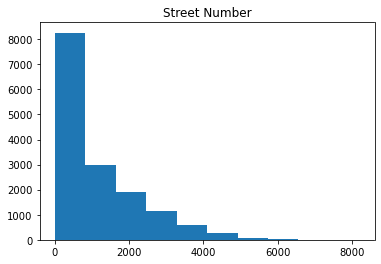

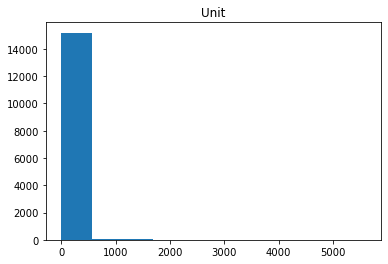

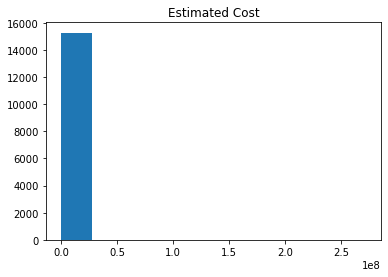

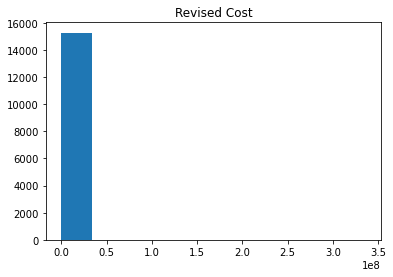

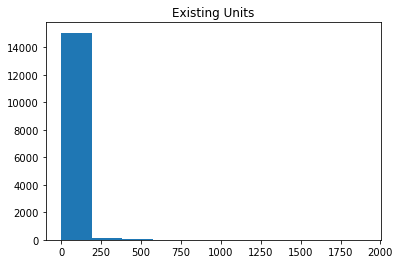

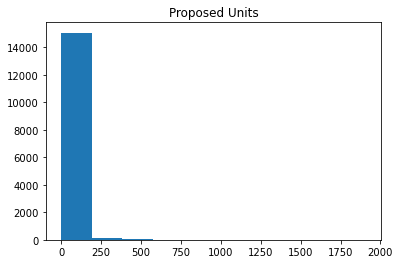

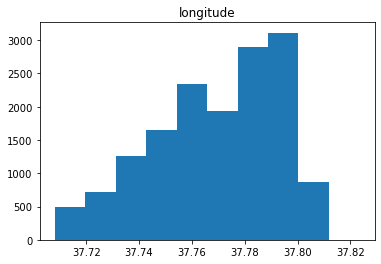

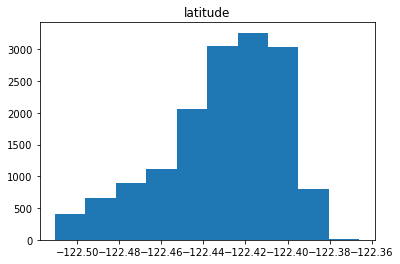

In [348]:
for col in dataE_6[col1]:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

C:\Users\computer world\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\computer world\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\computer world\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\U

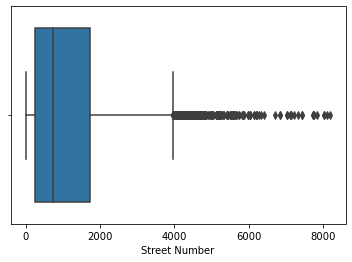

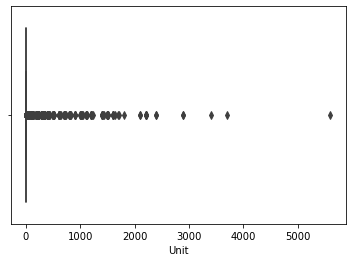

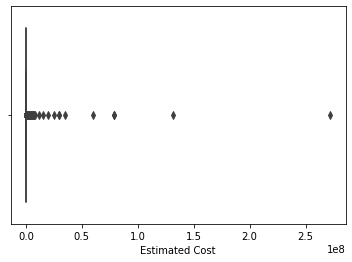

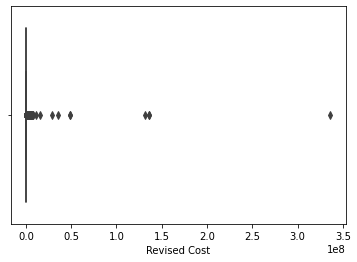

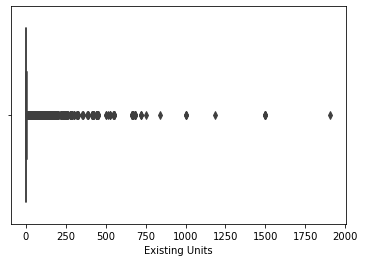

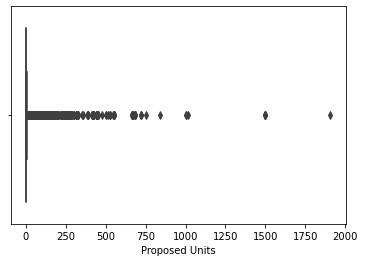

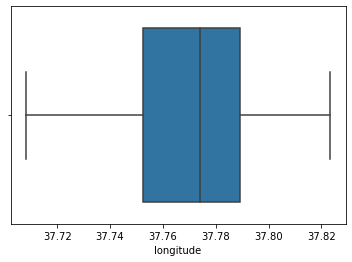

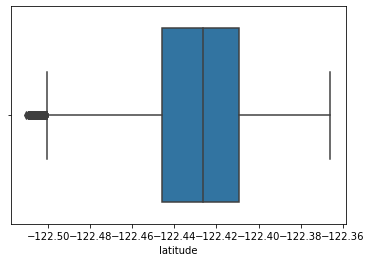

In [351]:
for col in dataE_6[col1]:
    plt.figure()
    sns.boxplot(col,data=dataE_6)

In [489]:
def outlier_removal(data,columns):
    """caps values greater than value
        of 90percentile to that value"""
    df_ = data.copy()
    for col in columns[1:-1]:
        high = df_[col].quantile(0.90)
        low = df_[col].quantile(0.05)
        df_.loc[df_[col]>high,col]=high
        df_.loc[df_[col]<low,col]=low
    return df_

In [490]:
#removing outliers in data
dataE_7 = outlier_removal(dataE_6,col1)

C:\Users\computer world\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\computer world\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\computer world\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\U

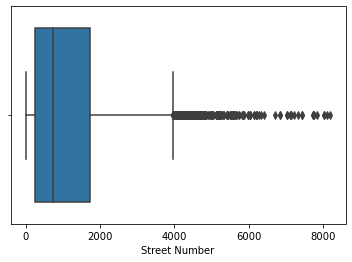

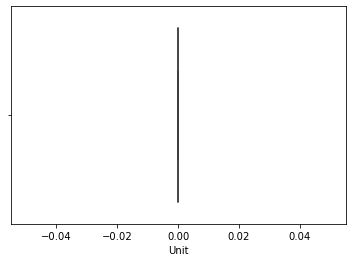

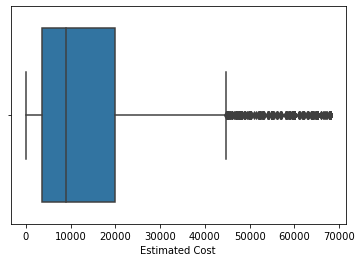

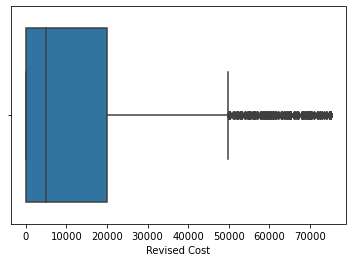

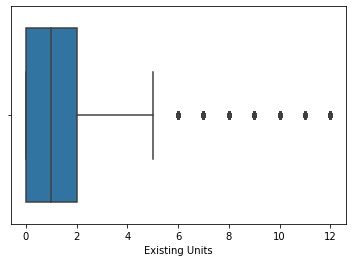

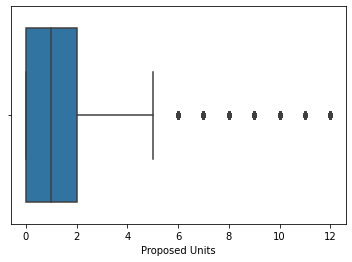

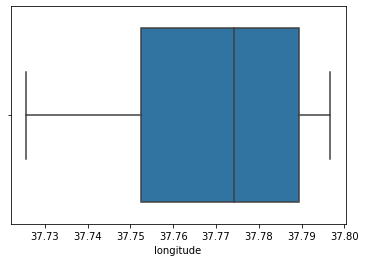

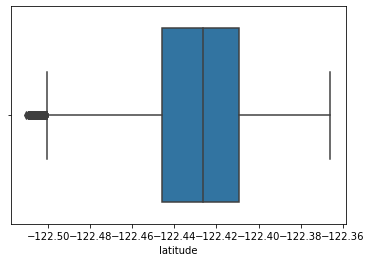

In [358]:
#visualizing outliers distribution still in data
for col in dataE_7[col1]:
    plt.figure()
    sns.boxplot(col,data=dataE_7)

<AxesSubplot:>

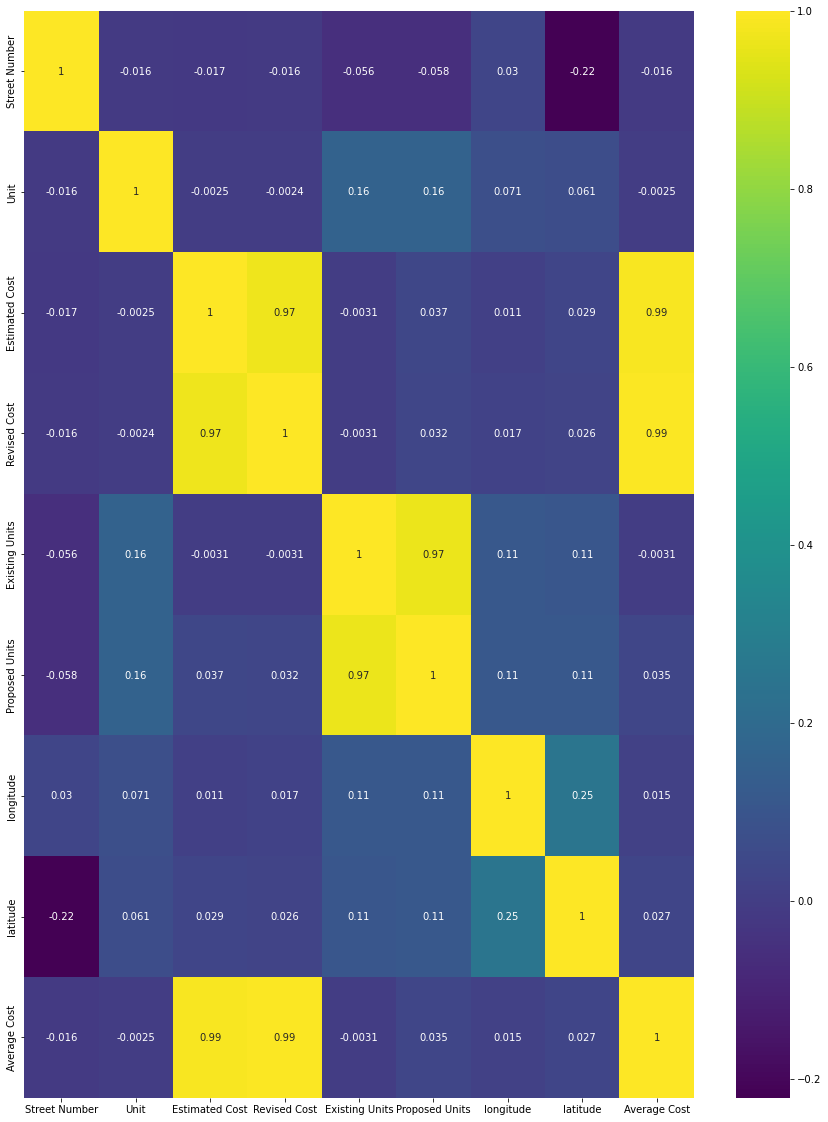

In [365]:
plt.figure(figsize=(15,20))
sns.heatmap(dataE_7[col1+['Average Cost']].corr(),cmap='viridis',annot=True)

In [491]:
def correlation(data,threshold):
    """gets one of two columns that
    are more than threshold value correlated"""
    col_corr = set()
    corr_matrix = data.corr()
    for col in range(len(corr_matrix.columns)):
        for cols in range(col):
            if abs(corr_matrix.iloc[col,cols])>threshold:
                colname = corr_matrix.columns[col]
                col_corr.add(colname)
    return col_corr

In [492]:
#Splitting data to dependent and independent variables
X = dataE_7.drop(columns='Average Cost')
y = dataE_7['Average Cost']

In [493]:
#getting columns with high correlation
columns_ = correlation(X,0.95)

In [494]:
columns_

{'Completed Date Weekofyear',
 'Current Status Date Weekofyear',
 'Estimated Total Number of Stories',
 'Existing Construction Type Description',
 'Filed Date Day',
 'Filed Date Month',
 'Filed Date Weekday',
 'Filed Date Weekofyear',
 'Filed Date Year',
 'First Construction Document Date Day',
 'First Construction Document Date Month',
 'First Construction Document Date Weekday',
 'First Construction Document Date Weekofyear',
 'First Construction Document Date Year',
 'Issued Date Weekofyear',
 'Issued Date Year',
 'Number of Existing Stories',
 'Permit Creation Date Weekofyear',
 'Proposed Construction Type Description',
 'Proposed Units',
 'radius',
 'rot_30_x',
 'rot_30_y',
 'rot_45_y'}

In [495]:
#dropping columns with high correlation
dataE_8 = dataE_7.drop(columns=columns_)

In [496]:
dataE_8.columns

Index(['Permit Type', 'Permit Type Definition', 'Street Number',
       'Current Status', 'Number of Proposed Stories', 'Fire Only Permit',
       'Estimated Cost', 'Existing Units', 'Plansets',
       'Existing Construction Type',
       ...
       'feature90', 'feature91', 'feature92', 'feature93', 'feature94',
       'feature95', 'feature96', 'feature97', 'feature98', 'feature99'],
      dtype='object', length=184)

<AxesSubplot:>

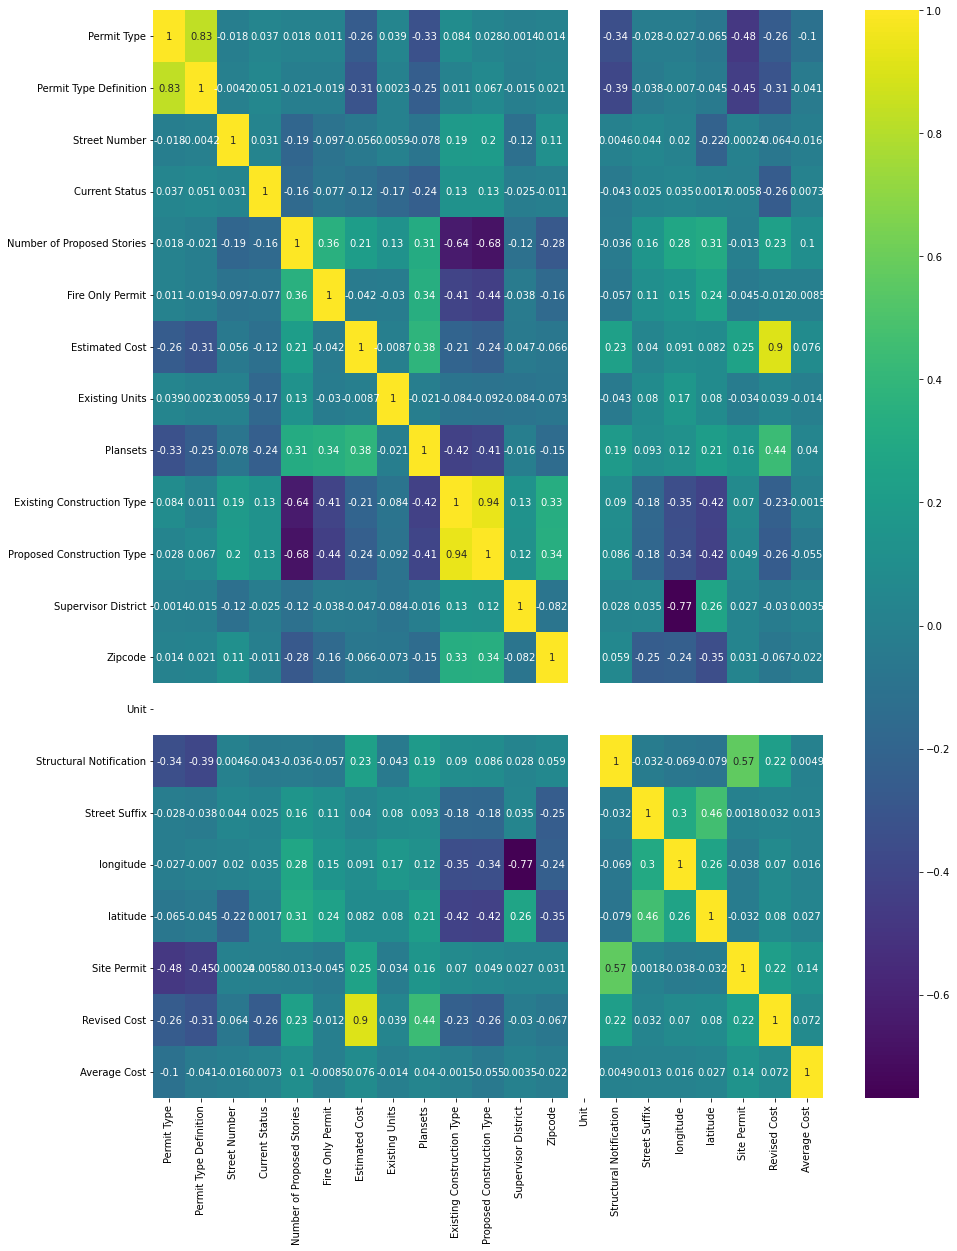

In [498]:
col2 = dataE_8.columns[:20].tolist()
plt.figure(figsize=(15,20))
sns.heatmap(dataE_8[col2+['Average Cost']].corr(),cmap='viridis',annot=True)

<AxesSubplot:>

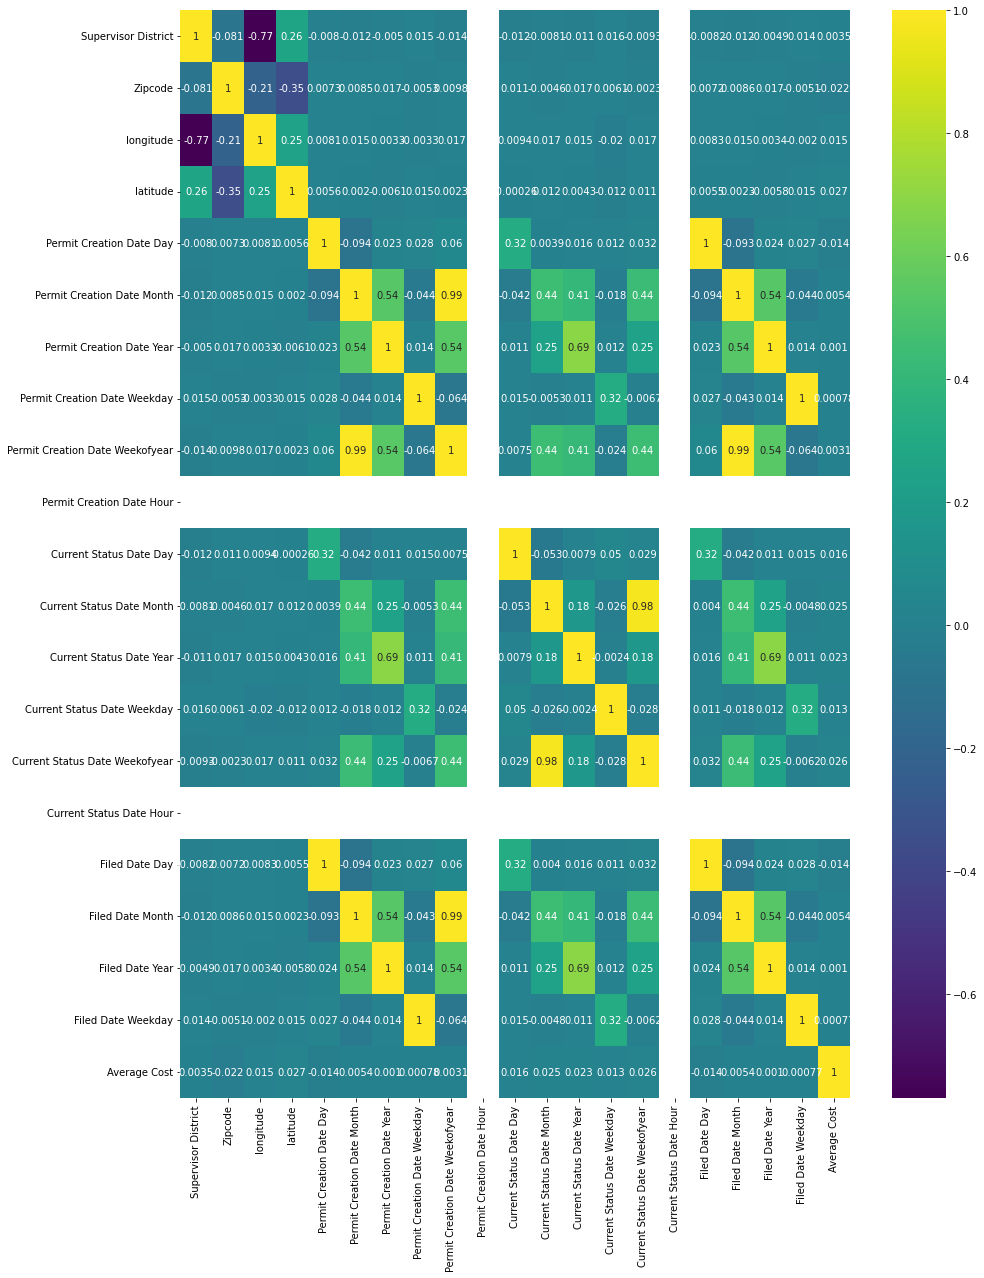

In [379]:
col2 = dataE_8.columns[20:40].tolist()
plt.figure(figsize=(15,20))
sns.heatmap(df[col2+['Average Cost']].corr(),cmap='viridis',annot=True)

In [499]:
X = df_new.drop(columns='Average Cost')
y = df_new['Average Cost']

## Feature Selection With Sklearn Libraries 

In [505]:
from sklearn.feature_selection import VarianceThreshold,mutual_info_regression,SelectKBest,f_regression

var_thresh = VarianceThreshold(0.05)
var_thresh.fit(X)
mutual_info = mutual_info_regression(X,y)
X_new = SelectKBest(score_func=f_regression, k=50,).fit_transform(X,y)

In [501]:
var_cols = [col for col in X.columns if col not in X.columns[var_thresh.get_support()]]
var_cols

['Unit',
 'Structural Notification',
 'Site Permit',
 'longitude',
 'latitude',
 'Permit Creation Date Hour',
 'Current Status Date Hour',
 'Filed Date Hour',
 'Issued Date Hour',
 'Completed Date Hour',
 'First Construction Document Date Hour',
 'Permit Expiration Date Hour',
 'theta',
 'rot_45_x',
 'feature0',
 'feature1',
 'feature2',
 'feature3',
 'feature4',
 'feature5',
 'feature6',
 'feature7',
 'feature8',
 'feature9',
 'feature10',
 'feature11',
 'feature12',
 'feature13',
 'feature14',
 'feature15',
 'feature16',
 'feature17',
 'feature18',
 'feature19',
 'feature20',
 'feature21',
 'feature22',
 'feature23',
 'feature24',
 'feature25',
 'feature26',
 'feature27',
 'feature28',
 'feature29',
 'feature30',
 'feature31',
 'feature32',
 'feature33',
 'feature34',
 'feature35',
 'feature36',
 'feature37',
 'feature38',
 'feature39',
 'feature40',
 'feature41',
 'feature42',
 'feature43',
 'feature44',
 'feature45',
 'feature46',
 'feature47',
 'feature48',
 'feature49',
 'feature

<AxesSubplot:>

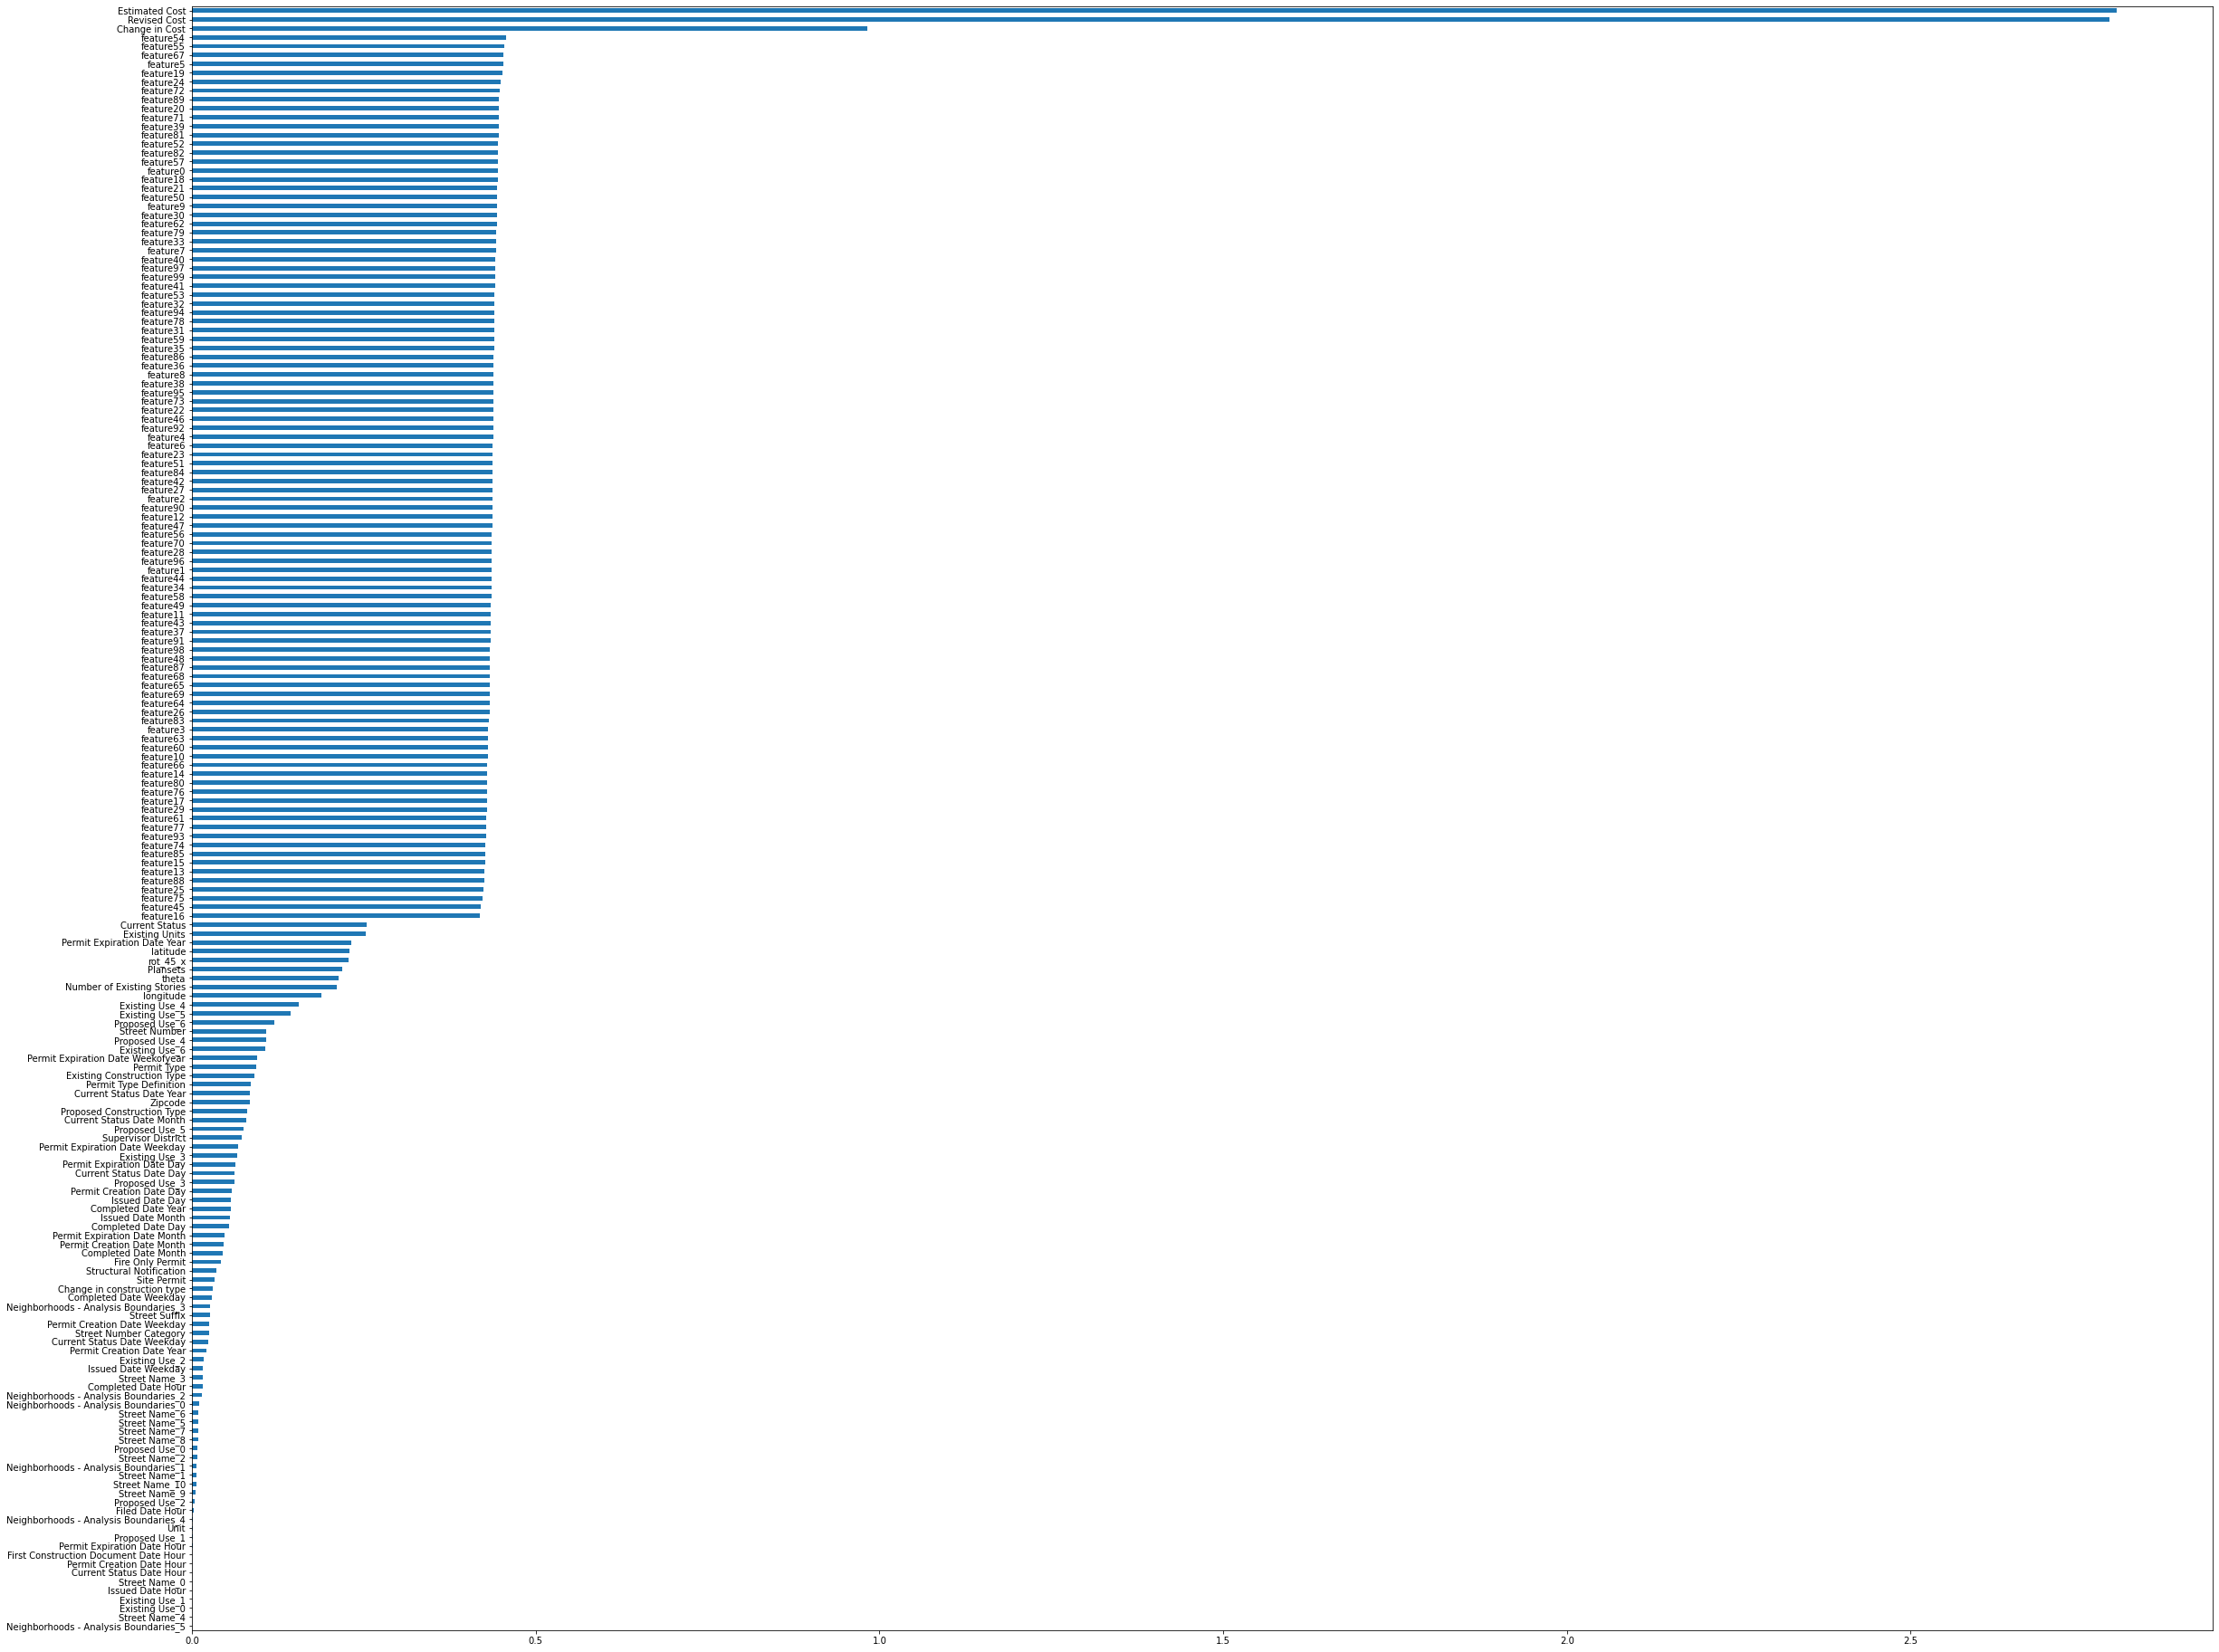

In [397]:
plt.figure(figsize=(40,33))
pd.Series(mutual_info,index=X.columns).sort_values(ascending=True).plot(kind='barh')

In [398]:
#dropping columns based on variance threshold
df_var = df_new.drop(columns=var_cols)

## Normalizing Data

In [400]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

In [402]:
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled

,Permit Type,Permit Type Definition,Street Number,Street Suffix,Unit,Current Status,Structural Notification,Number of Existing Stories,Fire Only Permit,Estimated Cost,...,Proposed Use_3,Proposed Use_4,Proposed Use_5,Proposed Use_6,Neighborhoods - Analysis Boundaries_0,Neighborhoods - Analysis Boundaries_1,Neighborhoods - Analysis Boundaries_2,Neighborhoods - Analysis Boundaries_3,Neighborhoods - Analysis Boundaries_4,Neighborhoods - Analysis Boundaries_5
0,0.428571,0.857143,0.016953,0.800000,0.0,0.363636,0.0,0.095238,0.0,0.058810,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.428571,0.857143,0.053543,0.800000,0.0,0.545455,0.0,0.111111,0.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.285714,0.000000,0.200756,0.066667,0.0,1.000000,0.0,0.095238,0.0,0.294107,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.000000,0.714286,0.149896,0.066667,0.0,0.272727,0.0,0.031746,0.0,0.029397,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.714286,0.142857,0.115746,0.800000,0.0,0.545455,0.0,0.047619,0.0,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15277,1.000000,0.714286,0.019637,0.800000,0.0,0.545455,0.0,0.031746,0.0,0.117634,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
15278,1.000000,0.714286,0.432736,0.800000,0.0,0.272727,0.0,0.031746,0.0,0.029397,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
15279,1.000000,0.714286,0.432980,0.800000,0.0,0.272727,0.0,0.031746,0.0,0.029397,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
15280,1.000000,0.714286,0.284547,0.800000,0.0,0.272727,0.0,0.031746,0.0,0.382344,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [405]:
df_complete = pd.concat([X,y],axis=1)
df_complete

,Permit Type,Permit Type Definition,Street Number,Street Suffix,Unit,Current Status,Structural Notification,Number of Existing Stories,Fire Only Permit,Estimated Cost,...,Proposed Use_4,Proposed Use_5,Proposed Use_6,Neighborhoods - Analysis Boundaries_0,Neighborhoods - Analysis Boundaries_1,Neighborhoods - Analysis Boundaries_2,Neighborhoods - Analysis Boundaries_3,Neighborhoods - Analysis Boundaries_4,Neighborhoods - Analysis Boundaries_5,Average Cost
0,4,6,140,12,0.0,4,0,6.0,0,4000.0,...,0,0,1,0,0,0,0,0,1,4000.0
1,4,6,440,12,0.0,6,0,7.0,0,1.0,...,0,0,1,0,0,0,0,0,1,250.5
2,3,0,1647,1,0.0,11,0,6.0,0,20000.0,...,0,1,0,0,0,0,0,1,0,12500.0
3,8,5,1230,1,0.0,3,0,2.0,0,2000.0,...,0,1,1,0,0,0,0,1,1,2000.0
4,6,1,950,12,0.0,6,0,3.0,0,68000.0,...,0,0,1,0,0,0,0,0,1,100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15277,8,5,162,12,0.0,6,0,2.0,0,8000.0,...,0,1,1,0,1,0,1,1,0,18000.0
15278,8,5,3549,12,0.0,3,0,2.0,0,2000.0,...,1,0,1,0,1,0,0,0,0,2000.0
15279,8,5,3551,12,0.0,3,0,2.0,0,2000.0,...,1,0,1,0,1,0,0,0,0,2000.0
15280,8,5,2334,12,0.0,3,0,2.0,0,26000.0,...,1,0,0,0,0,0,1,0,0,26000.0


In [406]:
df_complete.to_csv('feature_engineering.csv',index=False)